# Probability practice

**Part A.** Visitors to your website are asked to answer a single survey question before they get access to the content on the page. Among all of the users, there are two categories: Random Clicker (RC), and Truthful Clicker (TC). There are two possible answers to the survey: yes and no. Random clickers would click either one with equal probability. You are also giving the information that the expected fraction of random clickers is 0.3. After a trial period, you get the following survey results: 65% said Yes and 35% said No. What fraction of people who are truthful clickers answered yes? Hint: use the rule of total probability.

<div class="alert alert-block alert-success">Probability of being a Random Clicker i.e. P( rc ) = 0.3<br>
Since there are only two types of clickers, Probability of being a Truthful Clicker i.e. P( tc ) = 1 - 0.3 = 0.7<br><br>

Probability of a Random Clicker saying yes or no is equal.<br>
This implies that P( y | rc ) = P( n | rc ) = 0.5<br>

We need to calculate P( y | tc ). From the rule of total probability,<br>
P( y ) = P( y | rc ) $*$ P( rc ) + P( y | tc ) $*$ P( tc )<br>
=> 0.65 = 0.5 $*$ 0.3 + P( y | tc ) $*$ 0.7<br>
=>P( y | tc ) = 0.5/0.7 = 5/7 = 0.7143<br><br>

**Thus, around 71.43% of Truthful Clickers answered yes.**

**Part B.** Imagine a medical test for a disease with the following two attributes:

The sensitivity is about 0.993. That is, if someone has the disease, there is a probability of 0.993 that they will test positive.
The specificity is about 0.9999. This means that if someone doesn't have the disease, there is probability of 0.9999 that they will test negative.
In the general population, incidence of the disease is reasonably rare: about 0.0025% of all people have it (or 0.000025 as a decimal probability).
Suppose someone tests positive. What is the probability that they have the disease?

<div class="alert alert-block alert-success">We will use the following abbreviations :<br>
D - Has disease, ND - Does not have disease<br>
TP - Tested Positive, TN - Tested Negative<br><br>

The information provided is as follows:<br>
Probability of testing positive when someone has the disease i.e. P( TP / D ) = 0.993<br>
Probability of testing negative when someone does not have the disease i.e. P( TN / ND ) = 0.9999<br>
If someone does not have the disease, they can either test positive or negative. If the probability of testing negative is 0.9999, then the probability of testing positive i.e. P ( TP / ND ) = 1 - 0.9999 = 0.0001
Probability of someone having the disease i.e. P( D ) = 0.000025<br>
This means that the probability of not having the disease i.e. P ( ND ) = 1 - 0.000025 = 0.999975

We can use Bayes Theorem to tackle this problem. According to the Bayes Theorem,<br>
P ( D / TP ) = ( P ( D ) $*$ P ( TP / D ) ) / P( TP )<br>

Let's think about the term in the denominator, P ( TP ). People can test positive in two situations - when they have the disease or when they do not have the disease.

P ( TP ) = P ( TP / D ) $*$ P ( D ) + P ( TP / ND ) $*$ P ( ND ) = 0.993 $*$ 0.000025 + 0.0001 $*$ 0.999975 = 0.0001248225

Therefore,
P ( D / TP ) = ( 0.000025 $*$ 0.993 ) / ( 0.0001248225 ) = 0.198882413 <br><br>
**This means that if someone tests positive, then the probability they actually have the disease is 19.89%.**

In [1]:
pip install --upgrade torch torchvision

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install textstat

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install word2number

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.metrics.pairwise import cosine_similarity
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
import os
import glob
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk import pos_tag
import itertools
import networkx as nx
from collections import Counter
from textblob import TextBlob

In [5]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Wrangling the Billboard Top 100

Consider the data in billboard.csv containing every song to appear on the weekly Billboard Top 100 chart since 1958, up through the middle of 2021. Each row of this data corresponds to a single song in a single week. For our purposes, the relevant columns here are:<br>

performer: who performed the song<br>
song: the title of the song<br>
year: year (1958 to 2021)<br>
week: chart week of that year (1, 2, etc)<br>
week_position: what position that song occupied that week on the Billboard top 100 chart.<br>
Use your skills in data wrangling and plotting to answer the following three questions.<br>

In [6]:
# Importing the data
billboard=pd.read_csv('billboard.csv')

### Understanding the data
<div class="alert alert-block alert-success">Looking at the dimensions of the data as well as the records for one specific randomly chosen song to understand each variable properly

In [7]:
billboard.head()

,Unnamed: 0,url,week_id,week_position,song,performer,song_id,instance,previous_week_position,peak_position,weeks_on_chart,year,week
0,1,http://www.billboard.com/charts/hot-100/1965-0...,7/17/1965,34,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,45.0,34,4,1965,29
1,2,http://www.billboard.com/charts/hot-100/1965-0...,7/24/1965,22,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,34.0,22,5,1965,30
2,3,http://www.billboard.com/charts/hot-100/1965-0...,7/31/1965,14,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,22.0,14,6,1965,31
3,4,http://www.billboard.com/charts/hot-100/1965-0...,8/7/1965,10,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,14.0,10,7,1965,32
4,5,http://www.billboard.com/charts/hot-100/1965-0...,8/14/1965,8,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,10.0,8,8,1965,33


In [8]:
billboard.shape

(327895, 13)

In [9]:
billboard['week_id'].unique().size

3279

In [10]:
billboard[billboard['song']=="whoknows"]

,Unnamed: 0,url,week_id,week_position,song,performer,song_id,instance,previous_week_position,peak_position,weeks_on_chart,year,week
153364,153365,http://www.billboard.com/charts/hot-100/2004-0...,4/24/2004,75,whoknows,Musiq,whoknowsMusiq,1,NaN,75,1,2004,17
153365,153366,http://www.billboard.com/charts/hot-100/2004-0...,5/1/2004,69,whoknows,Musiq,whoknowsMusiq,1,75.0,69,2,2004,18
153366,153367,http://www.billboard.com/charts/hot-100/2004-0...,5/8/2004,65,whoknows,Musiq,whoknowsMusiq,1,69.0,65,3,2004,19
153367,153368,http://www.billboard.com/charts/hot-100/2004-0...,5/15/2004,72,whoknows,Musiq,whoknowsMusiq,1,65.0,65,4,2004,20
153368,153369,http://www.billboard.com/charts/hot-100/2004-0...,5/22/2004,72,whoknows,Musiq,whoknowsMusiq,1,72.0,65,5,2004,21
153369,153370,http://www.billboard.com/charts/hot-100/2004-0...,5/29/2004,85,whoknows,Musiq,whoknowsMusiq,1,72.0,65,6,2004,22
153370,153371,http://www.billboard.com/charts/hot-100/2004-0...,6/5/2004,86,whoknows,Musiq,whoknowsMusiq,1,85.0,65,7,2004,23
153371,153372,http://www.billboard.com/charts/hot-100/2004-0...,6/12/2004,92,whoknows,Musiq,whoknowsMusiq,1,86.0,65,8,2004,24
153372,153373,http://www.billboard.com/charts/hot-100/2004-0...,6/19/2004,99,whoknows,Musiq,whoknowsMusiq,1,92.0,65,9,2004,25
153373,153374,http://www.billboard.com/charts/hot-100/2004-0...,6/26/2004,92,whoknows,Musiq,whoknowsMusiq,1,99.0,65,10,2004,26


**Part A**: Make a table of the top 10 most popular songs since 1958, as measured by the total number of weeks that a song spent on the Billboard Top 100. Note that these data end in week 22 of 2021, so the most popular songs of 2021 will not have up-to-the-minute data; please send our apologies to The Weeknd. <br>

Your table should have 10 rows and 3 columns: performer, song, and count, where count represents the number of weeks that song appeared in the Billboard Top 100. Make sure the entries are sorted in descending order of the count variable, so that the more popular songs appear at the top of the table. Give your table a short caption describing what is shown in the table.<br>

(Note: you'll want to use both performer and song in any group_by operations, to account for the fact that multiple unique songs can share the same title.)

In [11]:
# Get each unique combination of song and performer using groupby and find out how many times it appears in the data
# This tells us how many times this song appeared on the Billboard Top 100
top_songs=billboard.groupby(['song','performer']).size()

# Sort by count values in descending order and keep the top 10 rows
top_10_songs=top_songs.sort_values(ascending=False).head(10)

# Convert to a dataframe
top_10_songs=pd.DataFrame(top_10_songs, columns=['count']).reset_index()
top_10_songs

,song,performer,count
0,Radioactive,Imagine Dragons,87
1,Sail,AWOLNATION,79
2,I'm Yours,Jason Mraz,76
3,Blinding Lights,The Weeknd,76
4,How Do I Live,LeAnn Rimes,69
5,Party Rock Anthem,LMFAO Featuring Lauren Bennett & GoonRock,68
6,Counting Stars,OneRepublic,68
7,Foolish Games/You Were Meant For Me,Jewel,65
8,Rolling In The Deep,Adele,65
9,Before He Cheats,Carrie Underwood,64


**Part B:** Is the "musical diversity" of the Billboard Top 100 changing over time? Let's find out. We'll measure the musical diversity of given year as the number of unique songs that appeared in the Billboard Top 100 that year. Make a line graph that plots this measure of musical diversity over the years. The x axis should show the year, while the y axis should show the number of unique songs appearing at any position on the Billboard Top 100 chart in any week that year. For this part, please filter the data set so that it excludes the years 1958 and 2021, since we do not have complete data on either of those years. Give the figure an informative caption in which you explain what is shown in the figure and comment on any interesting trends you see.

There are number of ways to accomplish the data wrangling here. For example, you could use two distinct sets of data-wrangling steps. The first set of steps would get you a table that counts the number of times that a given song appears on the Top 100 in a given year. The second set of steps operate on the result of the first set of steps; it would count the number of unique songs that appeared on the Top 100 in each year, irrespective of how many times it had appeared.

In [12]:
pd.set_option('display.max_rows', None)

# Grouping the data by year, song, and performer, and then counting the number of unique combinations
# Using both songs and performers to get distinct songs as recommended in Part A
diversity= billboard.groupby(['year', 'song', 'performer']).size().reset_index(name='count')

# Grouping again by year to get the total number of unique combinations of songs and performers for each year
diversity_year = diversity.groupby('year')['count'].count().reset_index()

# Renaming the columns for clarity
diversity_year.columns = ['year', 'number of unique songs']

# Remove the years 1958 and 2021
diversity_year=diversity_year[~diversity_year['year'].isin([1958,2021])]

diversity_year

,year,number of unique songs
1,1959,663
2,1960,700
3,1961,779
4,1962,768
5,1963,754
6,1964,811
7,1965,800
8,1966,832
9,1967,827
10,1968,772


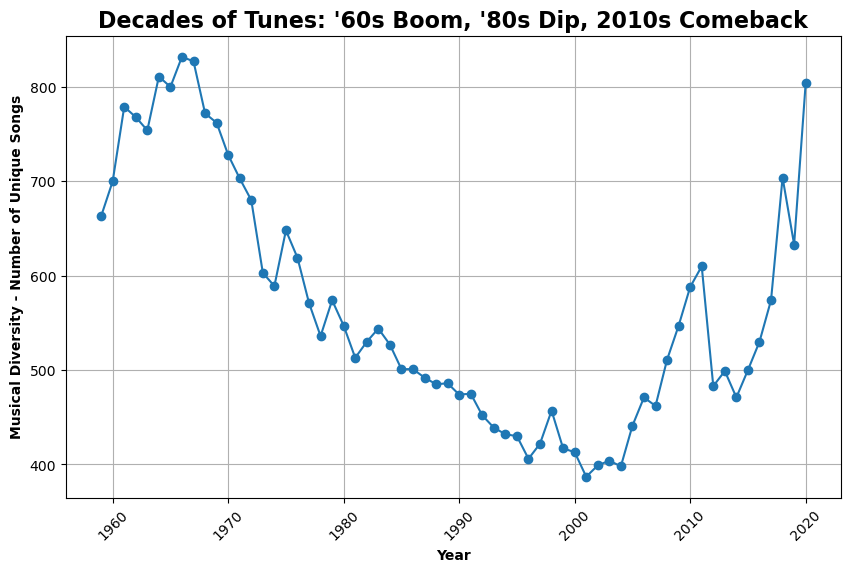

In [13]:
# Plotting the line graph for musical diversity over the years
plt.figure(figsize=(10, 6))
plt.plot(diversity_year['year'], diversity_year['number of unique songs'], marker='o', linestyle='-')
plt.xlabel('Year',fontdict={'weight': 'bold'})
plt.ylabel('Musical Diversity - Number of Unique Songs',fontdict={'weight': 'bold'})
plt.title("Decades of Tunes: '60s Boom, '80s Dip, 2010s Comeback",fontdict={'weight': 'bold', 'size': 16})
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

<div class="alert alert-block alert-success">
Trends and Insights from the data: <br>
    
 - **'60s Surge:** From 1959 to the mid-1960s, there's a clear rise in musical diversity, likely driven by cultural shifts and the emergence of genres like rock 'n' roll.

 - **Decades of Decline:** Post the mid-1960s peak, there's a gradual decline until the late 1980s. Industry consolidation and genre saturation might explain this trend.

 - **Stable Late 20th Century:** The period from the late '80s to early 2000s shows relative stability in song diversity, reflecting the mainstream dominance of genres like pop and hip-hop.

 - **Digital Boost:** Sporadic peaks in the 2000s align with the rise of digital music platforms, making production and distribution more accessible.

 - **Late 2010s Revival:** A notable increase in musical diversity from the late 2010s into 2020 can be attributed to platforms like Spotify and YouTube, democratizing music creation and sharing.

**Part C:** Let's define a "ten-week hit" as a single song that appeared on the Billboard Top 100 for at least ten weeks. There are 19 artists in U.S. musical history since 1958 who have had at least 30 songs that were "ten-week hits." Make a bar plot for these 19 artists, showing how many ten-week hits each one had in their musical career. Give the plot an informative caption in which you explain what is shown.

Notes:

You might find this easier to accomplish in two distinct sets of data wrangling steps.
Make sure that the individuals names of the artists are readable in your plot, and that they're not all jumbled together. If you find that your plot isn't readable with vertical bars, you can add a coord_flip() layer to your plot to make the bars (and labels) run horizontally instead.
By default a bar plot will order the artists in alphabetical order. This is acceptable to turn in. But if you'd like to order them according to some other variable, you can use the fct_reorder function, described in this blog post. This is optional.

In [14]:
# Perform the previous steps as you've done before
twh = billboard.groupby(['song', 'performer'])['week_id'].count().reset_index(name='count of weeks')
twh = twh[twh['count of weeks'] >= 10]
twh = twh.groupby('performer')['song'].count().reset_index(name='count of ten-week hits')

# Filter for performers who had at least 30 songs that were ten-week hits
twh_performers = twh[twh['count of ten-week hits'] >= 30].reset_index()

# Keep only 'performer' and 'count of ten-week hits' columns
twh_performers = twh_performers[['performer', 'count of ten-week hits']].sort_values(by='count of ten-week hits', ascending=False)

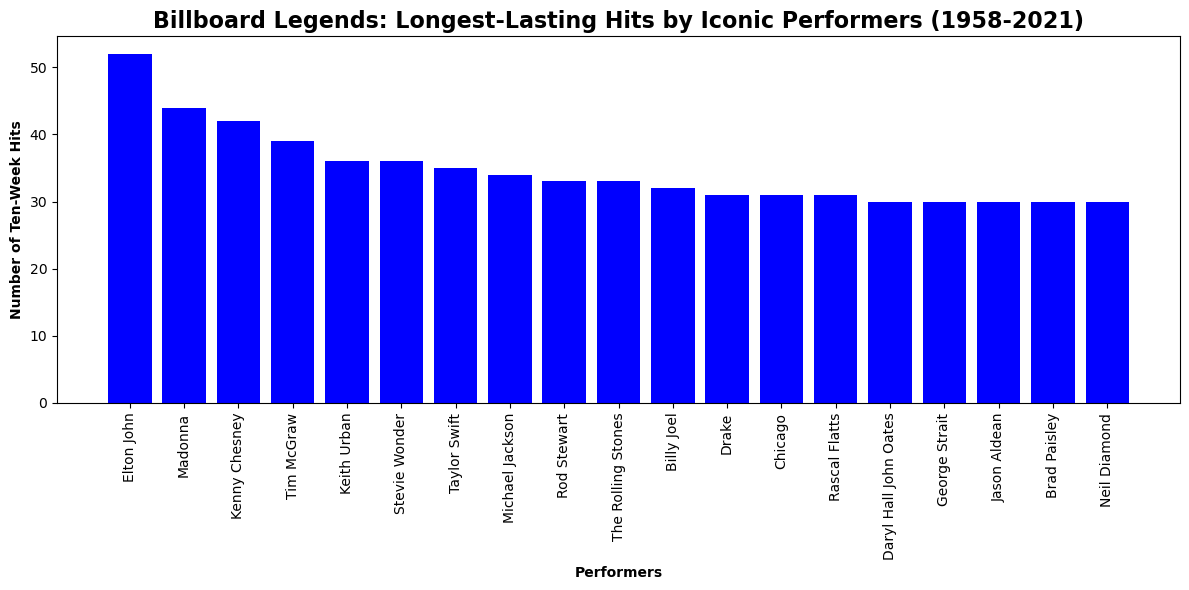

In [15]:
# Create the bar plot
plt.figure(figsize=(12, 6))
plt.bar(twh_performers['performer'], twh_performers['count of ten-week hits'], color='b')
plt.xlabel('Performers',fontdict={'weight': 'bold'})
plt.ylabel('Number of Ten-Week Hits',fontdict={'weight': 'bold'})
plt.title("Billboard Legends: Longest-Lasting Hits by Iconic Performers (1958-2021)",fontdict={'weight': 'bold', 'size': 16})
plt.xticks(rotation=90)
plt.tight_layout()

# Show the plot
plt.show()

# Visual story telling part 1: green buildings

The case
Over the past decade, both investors and the general public have paid increasingly close attention to the benefits of environmentally conscious buildings. There are both ethical and economic forces at work here. In commercial real estate, issues of eco-friendliness are intimately tied up with ordinary decisions about how to allocate capital. In this context, the decision to invest in eco-friendly buildings could pay off in at least four ways.

Every building has the obvious list of recurring costs: water, climate control, lighting, waste disposal, and so forth. Almost by definition, these costs are lower in green buildings.
Green buildings are often associated with better indoor environments—the kind that are full of sunlight, natural materials, and various other humane touches. Such environments, in turn, might result in higher employee productivity and lower absenteeism, and might therefore be more coveted by potential tenants. The financial impact of this factor, however, is rather hard to quantify ex ante; you cannot simply ask an engineer in the same way that you could ask a question such as, “How much are these solar panels likely to save on the power bill?”
Green buildings make for good PR. They send a signal about social responsibility and ecological awareness, and might therefore command a premium from potential tenants who want their customers to associate them with these values. It is widely believed that a good corporate image may enable a firm to charge premium prices, to hire better talent, and to attract socially conscious investors.
Finally, sustainable buildings might have longer economically valuable lives. For one thing, they are expected to last longer, in a direct physical sense. (One of the core concepts of the green-building movement is “life-cycle analysis,” which accounts for the high front-end environmental impact of ac- quiring materials and constructing a new building in the first place.) Moreover, green buildings may also be less susceptible to market risk—in particular, the risk that energy prices will spike, driving away tenants into the arms of bolder, greener investors.
Of course, much of this is mere conjecture. At the end of the day, tenants may or may not be willing to pay a premium for rental space in green buildings. We can only find out by carefully examining data on the commercial real-estate market.

The file greenbuildings.csv contains data on 7,894 commercial rental properties from across the United States. Of these, 685 properties have been awarded either LEED or EnergyStar certification as a green building. You can easily find out more about these rating systems on the web, e.g. at www.usgbc.org. The basic idea is that a commercial property can receive a green certification if its energy efficiency, carbon footprint, site selection, and building materials meet certain environmental benchmarks, as certified by outside engineers.

A group of real estate economists constructed the data in the following way. Of the 1,360 green-certified buildings listed as of December 2007 on the LEED or EnergyStar websites, current information about building characteristics and monthly rents were available for 685 of them. In order to provide a control population, each of these 685 buildings was matched to a cluster of nearby commercial buildings in the CoStar database. Each small cluster contains one green-certified building, and all non-rated buildings within a quarter-mile radius of the certified building. On average, each of the 685 clusters contains roughly 12 buildings, for a total of 7,894 data points.

The columns of the data set are coded as follows:

CS.PropertyID: the building's unique identifier in the CoStar database.
cluster: an identifier for the building cluster, with each cluster containing one green-certified building and at least one other non-green-certified building within a quarter-mile radius of the cluster center.
size: the total square footage of available rental space in the building.
empl.gr: the year-on-year growth rate in employment in the building's geographic region.
Rent: the rent charged to tenants in the building, in dollars per square foot per calendar year.
leasing.rate: a measure of occupancy; the fraction of the building's available space currently under lease.
stories: the height of the building in stories.
age: the age of the building in years.
renovated: whether the building has undergone substantial renovations during its lifetime.
class.a, class.b: indicators for two classes of building quality (the third is Class C). These are relative classifications within a specific market. Class A buildings are generally the highest-quality properties in a given market. Class B buildings are a notch down, but still of reasonable quality. Class C buildings are the least desirable properties in a given market.
green.rating: an indicator for whether the building is either LEED- or EnergyStar-certified.
LEED, Energystar: indicators for the two specific kinds of green certifications.
net: an indicator as to whether the rent is quoted on a "net contract" basis. Tenants with net-rental contracts pay their own utility costs, which are otherwise included in the quoted rental price.
amenities: an indicator of whether at least one of the following amenities is available on-site: bank, convenience store, dry cleaner, restaurant, retail shops, fitness center.
cd.total.07: number of cooling degree days in the building's region in 2007. A degree day is a measure of demand for energy; higher values mean greater demand. Cooling degree days are measured relative to a baseline outdoor temperature, below which a building needs no cooling.
hd.total07: number of heating degree days in the building's region in 2007. Heating degree days are also measured relative to a baseline outdoor temperature, above which a building needs no heating.
total.dd.07: the total number of degree days (either heating or cooling) in the building's region in 2007.
Precipitation: annual precipitation in inches in the building's geographic region.
Gas.Costs: a measure of how much natural gas costs in the building's geographic region.
Electricity.Costs: a measure of how much electricity costs in the building's geographic region.
cluster.rent: a measure of average rent per square-foot per calendar year in the building's local market.
The goal
An Austin real-estate developer is interested in the possible economic impact of "going green" in her latest project: a new 15-story mixed-use building on East Cesar Chavez, just across I-35 from downtown. Will investing in a green building be worth it, from an economic perspective? The baseline construction costs are `$100` million, with a 5$%$ expected premium for green certification.

The developer has had someone on her staff, who's been described to her as a "total Excel guru from his undergrad statistics course," run some numbers on this data set and make a preliminary recommendation. Here's how this person described his process.

I began by cleaning the data a little bit. In particular, I noticed that a handful of the buildings in the data set had very low occupancy rates (less than 10$%$ of available space occupied). I decided to remove these buildings from consideration, on the theory that these buildings might have something weird going on with them, and could potentially distort the analysis. Once I scrubbed these low-occupancy buildings from the data set, I looked at the green buildings and non-green buildings separately. The median market rent in the non-green buildings was `$25` per square foot per year, while the median market rent in the green buildings was `$27.60` per square foot per year: about `$2.60` more per square foot. (I used the median rather than the mean, because there were still some outliers in the data, and the median is a lot more robust to outliers.) Because our building would be 250,000 square feet, this would translate into an additional `$250000 x 2.6 = $650000` of extra revenue per year if we build the green building.

Our expected baseline construction costs are `$100` million, with a 5$%$ expected premium for green certification. Thus we should expect to spend an extra `$5 million` on the green building. Based on the extra revenue we would make, we would recuperate these costs in `$5000000/650000 = 7.7` years. Even if our occupancy rate were only 90$%$, we would still recuperate the costs in a little over 8 years. Thus from year 9 onwards, we would be making an extra `$650,000` per year in profit. Since the building will be earning rents for 30 years or more, it seems like a good financial move to build the green building.

The developer listened to this recommendation, understood the analysis, and still felt unconvinced. She has therefore asked you to revisit the report, so that she can get a second opinion.

Do you agree with the conclusions of her on-staff stats guru? If so, point to evidence supporting his case. If not, explain specifically where and why the analysis goes wrong, and how it can be improved. Do you see the possibility of confounding variables for the relationship between rent and green status? If so, provide evidence for confounding, and see if you can also make a picture that visually shows how we might "adjust" for such a confounder. Tell your story in pictures, with appropriate introductory and supporting text.

Note: this is intended as an exercise in visual and numerical story-telling. Your approach should rely on pictures and/or tables, not a regression model. Tell a story understandable to a non-technical audience. Keep it concise.

In [16]:
gb=pd.read_csv('greenbuildings.csv')
gb.head(20)

,CS_PropertyID,cluster,size,empl_gr,Rent,leasing_rate,stories,age,renovated,class_a,class_b,LEED,Energystar,green_rating,net,amenities,cd_total_07,hd_total07,total_dd_07,Precipitation,Gas_Costs,Electricity_Costs,cluster_rent
0,379105,1,260300,2.22,38.56,91.39,14,16,0,1,0,0,1,1,0,1,4988,58,5046,42.57,0.013700,0.029000,36.78
1,122151,1,67861,2.22,28.57,87.14,5,27,0,0,1,0,0,0,0,1,4988,58,5046,42.57,0.013731,0.029045,36.78
2,379839,1,164848,2.22,33.31,88.94,13,36,1,0,1,0,0,0,0,1,4988,58,5046,42.57,0.013731,0.029045,36.78
3,94614,1,93372,2.22,35.00,97.04,13,46,1,0,1,0,0,0,0,0,4988,58,5046,42.57,0.013731,0.029045,36.78
4,379285,1,174307,2.22,40.69,96.58,16,5,0,1,0,0,0,0,0,1,4988,58,5046,42.57,0.013731,0.029045,36.78
5,94765,1,231633,2.22,43.16,92.74,14,20,0,1,0,0,0,0,0,1,4988,58,5046,42.57,0.013731,0.029045,36.78
6,236739,6,210038,4.01,12.50,94.33,11,38,0,0,1,0,1,1,0,1,2746,1670,4416,25.55,0.010100,0.028900,17.50
7,234578,6,225895,4.01,14.77,91.02,15,24,0,1,0,0,0,0,0,1,2746,1670,4416,25.55,0.010118,0.028869,17.50
8,42087,6,912011,4.01,17.00,99.32,31,34,0,1,0,0,0,0,0,1,2746,1670,4416,25.55,0.010118,0.028869,17.50
9,233989,6,518578,4.01,17.00,93.54,21,36,1,1,0,0,0,0,0,1,2746,1670,4416,25.55,0.010118,0.028869,17.50


<div class="alert alert-block alert-success">The analysis conducted by an Excel expert within the developer's team is a focal point in the problem. We will make frequent references to this analysis throughout the solution, and for the purpose of this, let's name the expert Mr. Dibbles.

## Critiquing Mr. Dibbles' analysis

<div class="alert alert-block alert-success">
<strong>1. Removing Low-Occupancy Buildings:</strong>
Mr. Dibbles removed buildings with very low occupancy rates and while this may seem reasonable, it is  important to assess whether these low-occupancy buildings were disproportionately green-certified, as this could introduce bias in the analysis.

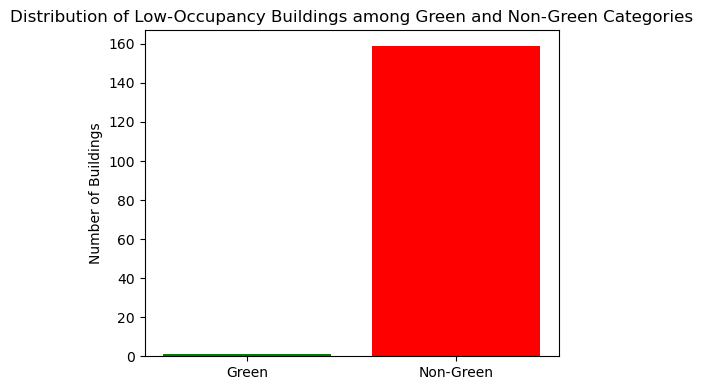

Percentage of low-occupancy buildings that are green: 0.625%
Percentage of low-occupancy buildings that are not green: 99.375%


In [17]:
low_occupancy_total = gb[gb['leasing_rate'] < 0.10].shape[0]
low_occupancy_green = gb[(gb['leasing_rate'] < 0.10) & (gb['green_rating'] == 1)].shape[0]
low_occupancy_nongreen = gb[(gb['leasing_rate'] < 0.10) & (gb['green_rating'] == 0)].shape[0]

green_percentage = (low_occupancy_green / low_occupancy_total) * 100
non_green_percentage = (low_occupancy_nongreen / low_occupancy_total) * 100

# Data for the bar plot
labels = ['Green', 'Non-Green']
values = [low_occupancy_green, low_occupancy_nongreen]

# Create the bar plot
plt.figure(figsize=(5, 4))
bars = plt.bar(labels, values, color=['green', 'red'])
plt.title('Distribution of Low-Occupancy Buildings among Green and Non-Green Categories')
plt.ylabel('Number of Buildings')
plt.tight_layout()
plt.show()

print(f"Percentage of low-occupancy buildings that are green: {green_percentage}%")
print(f"Percentage of low-occupancy buildings that are not green: {non_green_percentage}%")

<div class="alert alert-block alert-success">
When Mr. Dibbles removed these buildings, he essentially eliminated a significant portion of non-green buildings from the dataset. These buildings could have had either lower or higher rental prices. As a result, this action has the potential to artificially increase or decrease the average or median rent values of the remaining non-green buildings in the dataset. This, in turn, could lead to a skewed perspective when comparing the potentially inflated or deflated non-green building rent with the rental income of green buildings.<br>
Let's test this.

In [18]:
# 1. Calculate the Mean and Median Rents of the Original Dataset
mean_rent_original_green = gb[gb['green_rating'] == 1]['Rent'].mean()
median_rent_original_green = gb[gb['green_rating'] == 1]['Rent'].median()

mean_rent_original_nongreen = gb[gb['green_rating'] == 0]['Rent'].mean()
median_rent_original_nongreen = gb[gb['green_rating'] == 0]['Rent'].median()

# 2. Calculate the Mean and Median Rents after Removing Low-occupancy Buildings
filtered_gb = gb[gb['leasing_rate'] >= 0.10]  # Assuming 10% as the low-occupancy threshold

mean_rent_filtered_green = filtered_gb[filtered_gb['green_rating'] == 1]['Rent'].mean()
median_rent_filtered_green = filtered_gb[filtered_gb['green_rating'] == 1]['Rent'].median()

mean_rent_filtered_nongreen = filtered_gb[filtered_gb['green_rating'] == 0]['Rent'].mean()
median_rent_filtered_nongreen = filtered_gb[filtered_gb['green_rating'] == 0]['Rent'].median()

rent_comparison = {
    "Dataset": ["All", "Filtered"],
    "Green - Median Rent": [median_rent_original_green, median_rent_filtered_green],
    "Non-Green - Median Rent": [median_rent_original_nongreen, median_rent_filtered_nongreen],
    "Green - Mean Rent": [mean_rent_original_green, mean_rent_filtered_green],
    "Non-Green - Mean Rent": [mean_rent_original_nongreen, mean_rent_filtered_nongreen]
}

rent_comparison_df = pd.DataFrame(rent_comparison)
rent_comparison_df

,Dataset,Green - Median Rent,Non-Green - Median Rent,Green - Mean Rent,Non-Green - Mean Rent
0,All,27.6,25.0,30.016029,28.266778
1,Filtered,27.6,25.0,30.028480,28.414156


<div class="alert alert-block alert-success">This data suggests that removing low-occupancy buildings slightly increased the mean rents for both green and non-green buildings. However, the magnitude of the increase is small, and the median rents (which are more robust to outliers) remain unchanged.

Given this, it seems that the removal of low-occupancy buildings did not significantly inflate or deflate the rent expectations for either green or non-green buildings based on the mean and median values. 

<div class="alert alert-block alert-success"> <strong>2. Leasing Rate Threshold :</strong><br>
Before we move on, let's look at the distribution for leasing rate over the dataset. This is because Mr. Dibbles picked 10% as the threshold for low occupancy and we want to confirm if this is an appropriate choice.

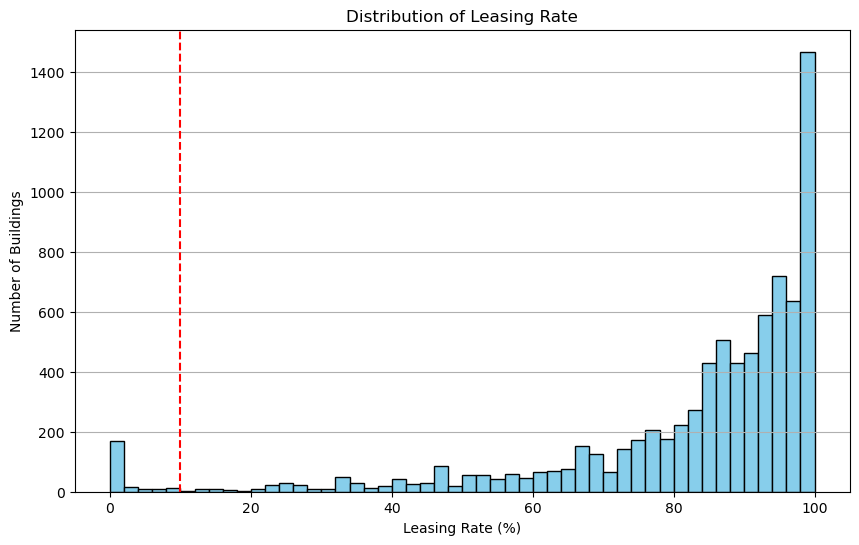

In [19]:
# Plot distribution of leasing_rate
plt.figure(figsize=(10,6))
plt.hist(gb['leasing_rate'], bins=50, color='skyblue', edgecolor='black')
plt.axvline(x=10, color='red', linestyle='--')
plt.xlabel('Leasing Rate (%)')
plt.ylabel('Number of Buildings')
plt.title('Distribution of Leasing Rate')
plt.grid(axis='y')
plt.show()

<div class="alert alert-block alert-success">The distribution of the leasing rate shows that a majority of buildings have a leasing rate above 10%. The red dashed line at 10% highlights the cutoff used by the developer's expert to remove buildings with low occupancy. This approach seems reasonable, as only a few buildings have a leasing rate below this threshold.

<div class="alert alert-block alert-success"> <strong> Confounding Variables : </strong><br>
So far, Mr.Dibbles' analysis seems accurate. However, let's consider the potential confounding variables. A confounding variable is an external factor that might affect both the predictor (in this case, green status) and the outcome (rent) and give a spurious association.

<div class="alert alert-block alert-success">From the dataset description, several potential confounders stand out:

 - <strong>Building Class:</strong> Buildings of higher quality (like Class A) may be more likely to have green certifications and also might command higher rents.
 - <strong>Size:</strong> Larger buildings may have different rent structures and might also be more likely to invest in green technologies.
 - <strong>Age & Renovation:</strong> Newer or renovated buildings might be designed with more environmentally conscious features and could command higher rents.
 - <strong>Amenities:</strong> Buildings with more amenities could have higher rents and might also be more likely to pursue green certifications.
 - <strong>Local Market Rent:</strong> The average rent in a building's local market could influence both the building's rent and its decision to go green.

<div class="alert alert-block alert-success">In the following section, we will provide evidence indicating that building class and amenities act as confounders. This is supported by the observed systematic correlation with Green Certification, along with its connection to Rent.

### Building Class

In [20]:
# Calculate mean and median rent based on class_a
mean_rent_by_class_a = filtered_gb.groupby('class_a')['Rent'].mean()
median_rent_by_class_a = filtered_gb.groupby('class_a')['Rent'].median()

# Calculate percentage of green-certified buildings based on class_a
green_counts_by_class_a = filtered_gb.groupby('class_a')['green_rating'].sum()
total_counts_by_class_a = filtered_gb.groupby('class_a').size()
green_proportion_by_class_a = (green_counts_by_class_a / total_counts_by_class_a) 

# Create a DataFrame to display the results in table form for class_a
class_a_table = pd.DataFrame({
    'Mean Rent': mean_rent_by_class_a,
    'Median Rent': median_rent_by_class_a,
    'Proportion Green-Certified (%)': green_proportion_by_class_a
})

class_a_table.reset_index()

,class_a,Mean Rent,Median Rent,Proportion Green-Certified (%)
0,0,25.955740,23.7,0.030085
1,1,32.348364,28.2,0.173499


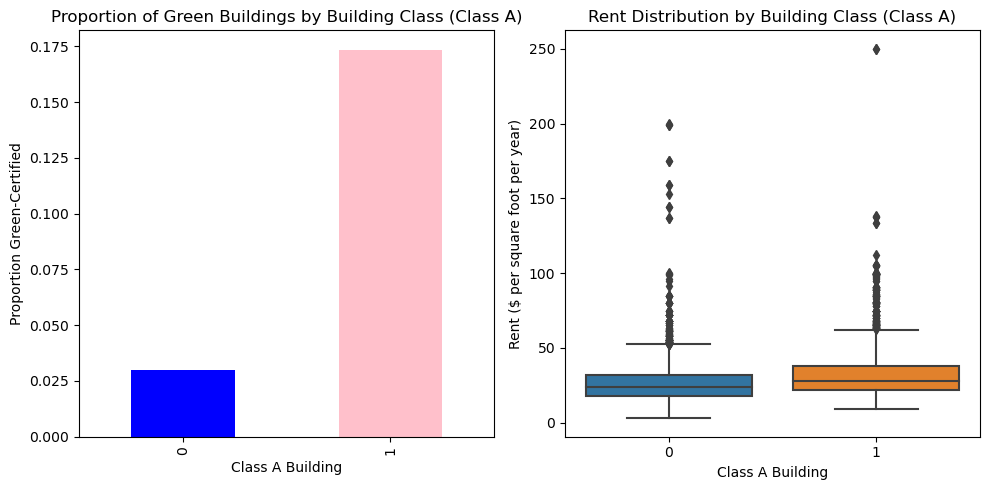

In [21]:
# Create plots
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Bar plot for association between Building Class (Class A) and Green Rating with proportions
green_proportion_by_class_a.plot(kind='bar', ax=ax[0],color=['blue', 'pink'])
ax[0].set_title('Proportion of Green Buildings by Building Class (Class A)')
ax[0].set_xlabel('Class A Building')
ax[0].set_ylabel('Proportion Green-Certified')

# Box plot for Rent distribution by Building Class (Class A)
sns.boxplot(x='class_a', y='Rent', data=filtered_gb, ax=ax[1])
ax[1].set_title('Rent Distribution by Building Class (Class A)')
ax[1].set_xlabel('Class A Building')
ax[1].set_ylabel('Rent ($ per square foot per year)')

plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">
    
 - <strong>Association with Green Certification:</strong> The proportion of green-certified buildings is higher among Class A buildings than non-Class A buildings. This indicates that higher-quality buildings are more likely to be green-certified.
 - <strong>Effect on Rent:</strong> Class A buildings tend to command higher rents than non-Class A buildings, as expected.<br>
Thus, building class (Class A) is a confounder as it's associated with both green certification and rent.

### Amenities

In [22]:
# Calculate mean and median rent based on amenities
mean_rent_by_amenities = filtered_gb.groupby('amenities')['Rent'].mean()
median_rent_by_amenities = filtered_gb.groupby('amenities')['Rent'].median()

# Calculate percentage of green-certified buildings based on amenities
green_counts_by_amenities = filtered_gb.groupby('amenities')['green_rating'].sum()
total_counts_by_amenities = filtered_gb.groupby('amenities').size()
green_percentage_by_amenities = (green_counts_by_amenities / total_counts_by_amenities) * 100

# Create a DataFrame to display the results in table form
amenities_table = pd.DataFrame({
    'Mean Rent': mean_rent_by_amenities,
    'Median Rent': median_rent_by_amenities,
    'Percentage Green-Certified (%)': green_percentage_by_amenities
})

amenities_table.reset_index()

,amenities,Mean Rent,Median Rent,Percentage Green-Certified (%)
0,0,27.696348,25.2,5.181058
1,1,29.302459,25.4,12.017375


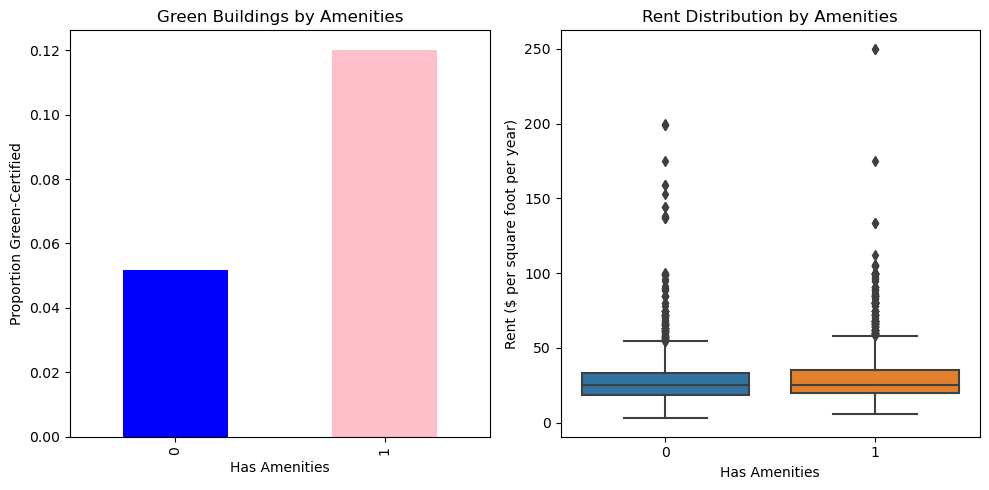

In [23]:
# Calculate proportions of Green-Certified buildings for each category of amenities
proportions = filtered_gb.groupby('amenities')['green_rating'].mean()

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Bar plot for association between Amenities and Green Rating
proportions.plot(kind='bar', ax=ax[0],color=['blue', 'pink'])
ax[0].set_title('Green Buildings by Amenities')
ax[0].set_xlabel('Has Amenities')
ax[0].set_ylabel('Proportion Green-Certified')

# Box plot for Rent distribution by Amenities
sns.boxplot(x='amenities', y='Rent', data=filtered_gb, ax=ax[1])
ax[1].set_title('Rent Distribution by Amenities')
ax[1].set_xlabel('Has Amenities')
ax[1].set_ylabel('Rent ($ per square foot per year)')

plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">
    
 - <strong>Association with Green Certification:</strong> Buildings with amenities have a higher proportion of green certifications compared to those without amenities. This suggests that buildings offering amenities are more likely to be green-certified.
 - <strong>Effect on Rent:</strong> Buildings with amenities tend to command higher rents than those without amenities. <strong>Note that the difference in median rents, however, is very small, so we cannot say with as much confidence as in the case of the building class A, that there is a relationship here.</strong><br>
Given these observations, the presence of amenities might be a confounder but we will need to do more analysis to confirm for sure.

<div class="alert alert-block alert-success">The remaining potential confounders, upon investigation, did not demonstrate a significant confounding effect.

<div class="alert alert-block alert-success"> <strong> Adjustment for Confounding Variables : </strong>

<div class="alert alert-block alert-success">Let us limit ourselves to building class A at the moment to understand how to adjust for confounding variables.

<div class="alert alert-block alert-success">
In our problem, we're trying to understand if green certification affects rent. Class A status is our confounder. So, we need to "adjust" for this by essentially asking: "Among buildings of the same class (e.g., all Class A or all non-Class A), does green certification still make a difference in rent?" <br>

<strong>How the visualization helps:</strong> The boxplot stratifies buildings by class (Class A and non-Class A). Within each class, it compares the rent between green and non-green buildings. By doing this, it allows us to see the effect of green certification on rent within each class, separate from the class's overall effect.

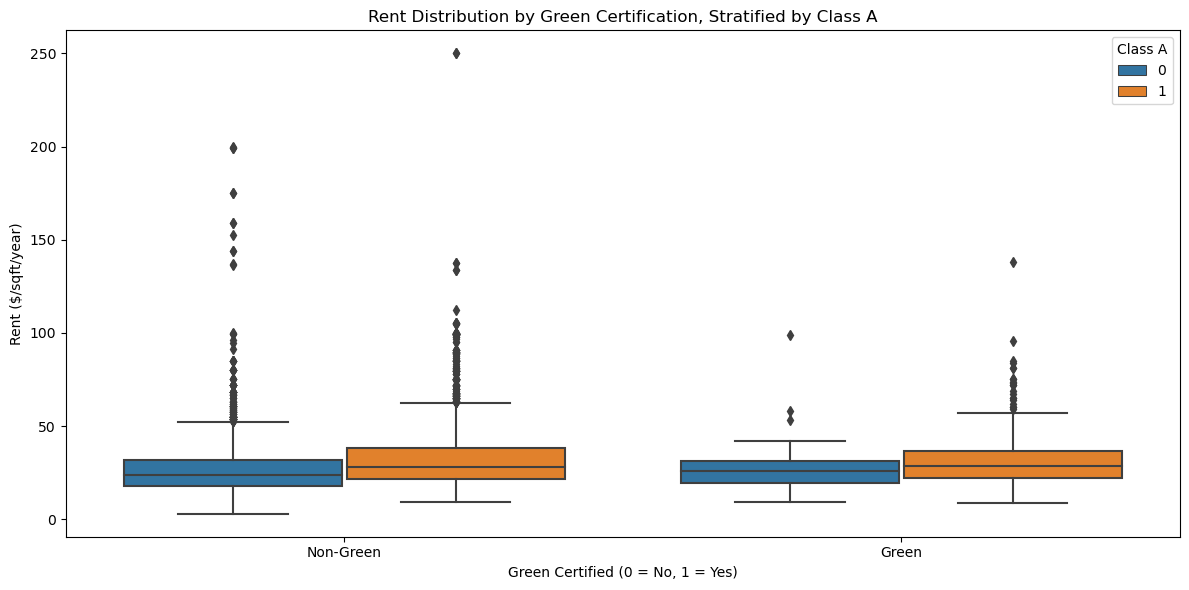

In [24]:
# Set up the figure and axes
plt.figure(figsize=(12, 6))

# Create a boxplot
sns.boxplot(data=filtered_gb, x="green_rating", y="Rent", hue="class_a")

# Customizing the plot
plt.title("Rent Distribution by Green Certification, Stratified by Class A")
plt.xlabel("Green Certified (0 = No, 1 = Yes)")
plt.ylabel("Rent ($/sqft/year)")
plt.legend(title="Class A")
plt.xticks([0, 1], ["Non-Green", "Green"])

plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">
    
From the plot, a few observations can be made:<br>
    
 - Both in Class A and non-Class A categories, green-certified buildings tend to have higher median rents than their non-green counterparts
 - The difference in rent between green and non-green buildings seems more pronounced in the Class A category
 - The overall distribution of rents is higher for Class A buildings, confirming that building class is indeed a confounding factor <br>
   
By "adjusting" for the building class in this manner, we get a clearer picture of the relationship between green certification and rent, separate from the effect of the building class.

## Other Hypotheses and Insights

<div class="alert alert-block alert-success"> We've spent a fair amount of time examining and critiquing Mr. Dibbles' approach. Let us now focus on understanding the data a little bit better so we can come up with a better method to calculate expected revenue and profits.

<div class="alert alert-block alert-success"> 
<strong>1. Energy needs for Green vs Non-Green buildings:</strong> As expected, non-green buildings have higher energy needs. This can lead to savings that will translate into higher profit.

Average Energy needs for Green Buildings: 4217.8859649122805
Average Energy needs for Non-Green Buildings: 4701.907517730497


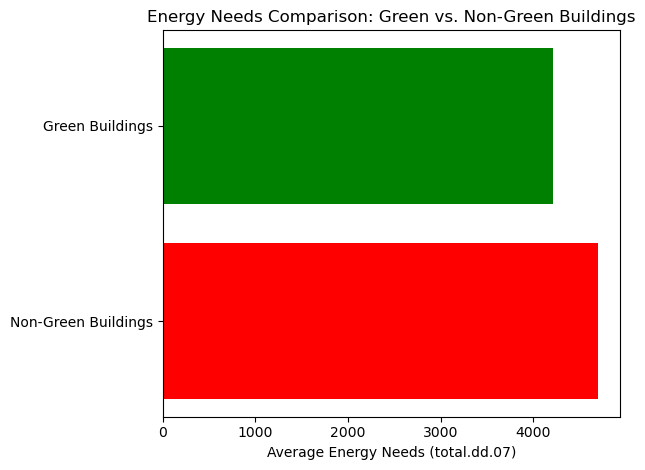

In [25]:
# Calculate average energy needs for green and non-green buildings
avg_energy_green = filtered_gb[filtered_gb['green_rating'] == 1]['total_dd_07'].mean()
avg_energy_nongreen = filtered_gb[filtered_gb['green_rating'] == 0]['total_dd_07'].mean()

print("Average Energy needs for Green Buildings:",avg_energy_green)
print("Average Energy needs for Non-Green Buildings:",avg_energy_nongreen)

# Create horizontal bar graph
labels = ['Green Buildings', 'Non-Green Buildings']
values = [avg_energy_green, avg_energy_nongreen]
colors = ['green', 'red']

plt.barh(labels, values, color=colors)
plt.xlabel('Average Energy Needs (total.dd.07)')
plt.title('Energy Needs Comparison: Green vs. Non-Green Buildings')
plt.gca().invert_yaxis()  # to display the green buildings on top
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success"> 
<strong>2. Gas and Electricity Costs for Green vs Non-Green buildings:</strong> Surprisingly, Gas costs are the same for both kinds of buildings and Electricity costs are actually marginally lower for Non-Green buildings. <br>
The higher prevalence of amenities in green buildings might explain the slightly elevated electricity costs. Amenities, depending on their nature, can lead to increased energy consumption. For example, fitness centers, advanced lighting systems, or electric vehicle charging stations might consume more electricity.

In [26]:
# Calculate average Gas costs for green and non-green buildings
avg_gas_green = filtered_gb[filtered_gb['green_rating'] == 1]['Gas_Costs'].mean()
avg_gas_nongreen = filtered_gb[filtered_gb['green_rating'] == 0]['Gas_Costs'].mean()

# Calculate average Electricity costs for green and non-green buildings
avg_electricity_green = filtered_gb[filtered_gb['green_rating'] == 1]['Electricity_Costs'].mean()
avg_electricity_nongreen = filtered_gb[filtered_gb['green_rating'] == 0]['Electricity_Costs'].mean()

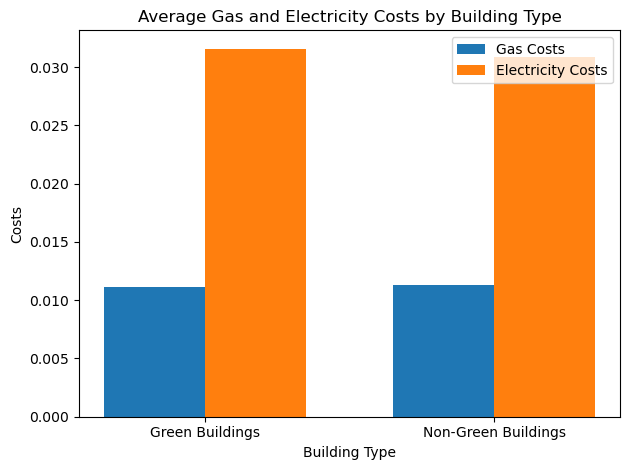

Average Gas Costs for Green Buildings: 0.011
Average Gas Costs for Non-Green Buildings: 0.011
Average Electricity Costs for Green Buildings: 0.032
Average Electricity Costs for Non-Green Buildings: 0.031


In [27]:
labels = ['Green Buildings', 'Non-Green Buildings']
gas_costs = [avg_gas_green, avg_gas_nongreen]
electricity_costs = [avg_electricity_green, avg_electricity_nongreen]

x = range(len(labels))  # the label locations

fig, ax = plt.subplots()
bar_width = 0.35  # the width of the bars

rects1 = ax.bar(x, gas_costs, bar_width, label='Gas Costs')
rects2 = ax.bar([i + bar_width for i in x], electricity_costs, bar_width, label='Electricity Costs')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Building Type')
ax.set_ylabel('Costs')
ax.set_title('Average Gas and Electricity Costs by Building Type')
ax.set_xticks([i + bar_width / 2 for i in x])
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

print("Average Gas Costs for Green Buildings:",round(avg_gas_green,3))
print("Average Gas Costs for Non-Green Buildings:",round(avg_gas_nongreen,3))

print("Average Electricity Costs for Green Buildings:",round(avg_electricity_green,3))
print("Average Electricity Costs for Non-Green Buildings:",round(avg_electricity_nongreen,3))

<div class="alert alert-block alert-success"> 
<strong>3. Precipitation and Rent:</strong> We expected to see rents going down as precipitation goes up in our data. This is because precipitation data can be used as a proxy to gauge potential for water damage costs in certain regions. However, we saw no evidence of this and the correlation coefficient between the two variables was very low (~0.07). This means precipitation levels should not be incorporated in our revenue calculation framework.

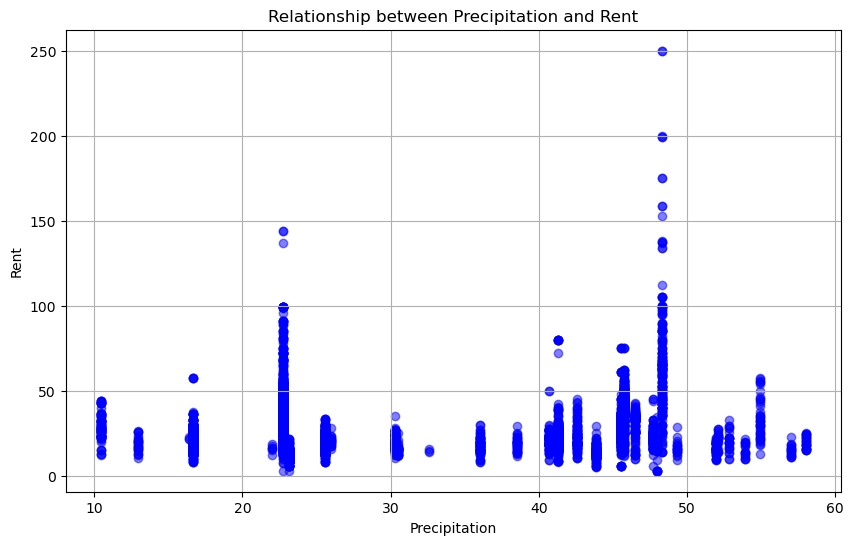

In [28]:
# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(filtered_gb['Precipitation'], filtered_gb['Rent'], color='blue', alpha=0.5)
plt.title('Relationship between Precipitation and Rent')
plt.xlabel('Precipitation')
plt.ylabel('Rent')
plt.grid(True)
plt.show()

In [29]:
correlation = filtered_gb['Precipitation'].corr(filtered_gb['Rent'])
print("Correlation between precipitation and rent:", correlation)

Correlation between precipitation and rent: 0.06854327607475379


<div class="alert alert-block alert-success"> 
<strong>4. Employee Growth Rate and Rent:</strong> Our hypothesis is that average empl_gr value can be used as a proxy for the rent growth rate, as higher employment growth in a region may indicate greater demand for office space. But we fail to see any systematic correlation between the two variables in our data and therefore will not incorporate it in our revenue calculation framework.

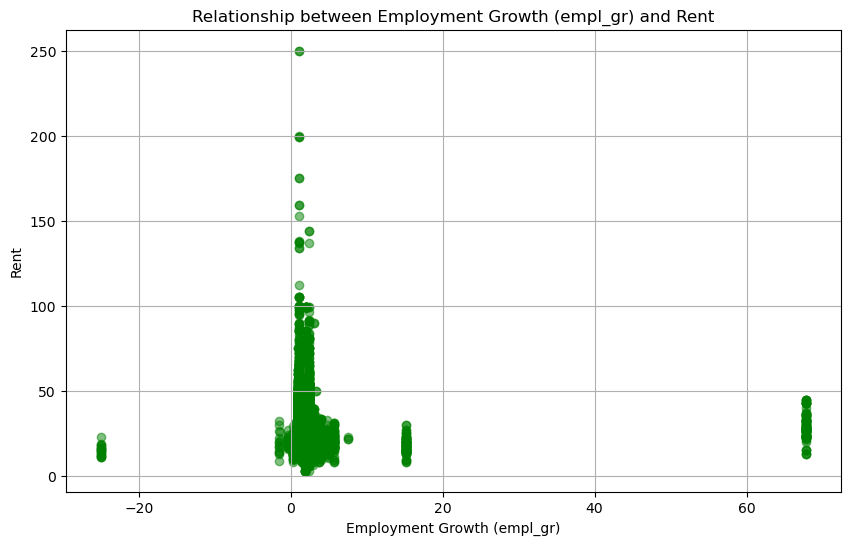

In [30]:
# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(filtered_gb['empl_gr'], filtered_gb['Rent'], color='green', alpha=0.5)
plt.title('Relationship between Employment Growth (empl_gr) and Rent')
plt.xlabel('Employment Growth (empl_gr)')
plt.ylabel('Rent')
plt.grid(True)
plt.show()

In [31]:
correlation = filtered_gb['empl_gr'].corr(filtered_gb['Rent'])
print("Correlation between employment growth (empl_gr) and rent:", correlation)

Correlation between employment growth (empl_gr) and rent: -0.024017033156553323


## New Revenue and Profit Calculation Framework:

<div class="alert alert-block alert-success"> 
   

Based on the insights we've gathered, it's clear that including the following elements in the calculation framework can not only address the issues found in Mr. Dibbles' design but also enhance the framework's overall robustness:
    
#### 1. Yearly Rent Revenue:

 -  **Median Rent Premium for green-certified buildings**:  
    This provides a baseline comparison between green and non-green buildings in terms of rent per square foot.
    
 -  **Yearly Rent Growth Rate**:  
   Mr. Dibbles did not incorporate rent growth into his analysis and this will be vital in calculating revenue and profits over time.

 - **Building Classification & Amenities**:  
    If the building has amenities or is a Class A building, there will be an additional premium and rent will likely be higher.

#### 2. Occupancy Factor:

 -  **Initial occupancy rate**:  
    This could be the current average leasing rate for green buildings.

 -  **Yearly Occupancy Growth Rate**:  
    Buildings with amenities or a Class A status typically have higher occupancy rates. The growth in occupancy could also be influenced by the overall growth rate of the region or city where the building is located.

 -  **Building Classification & Amenities**:  
    Similar to rent, having amenities or being a Class A building could lead to a higher occupancy rate.
 
#### 3. Reduced Energy Needs for Green Buildings:
Green-certified buildings typically have lower energy needs due to efficient designs and technologies. This can lead to substantial energy savings over the lifespan of the building (Basing this off of the low energy needs chart even though the gas and electricity costs data does not align with this. We need more data to confirm this.)

#### 4. External Factors:

 -  **Regulations, Incentives, or Subsidies**:  
    Be aware of potential regulations, incentives, or subsidies for green buildings which can affect costs or revenue.

#### 5. Loan and Depreciation:

 -  **Interest**:  
    If the construction costs are financed, the interest on the loan will need to be factored into the overall cost.

 -  **Depreciation**:  
    Over time, the building will depreciate in value. This needs to be considered when calculating net profit over the lifespan of the building. Green buildings usually incorporate sustainable materials and designs that may have longer lifespans than traditional materials. This can mean less wear and tear and, therefore, slower physical depreciation.


# Visual story telling part 2: Capital Metro data

The file capmetro_UT.csv contains data from Austin's own Capital Metro bus network, including shuttles to, from, and around the UT campus. These data track ridership on buses in the UT area. Ridership is measured by an optical scanner that counts how many people embark and alight the bus at each stop. Each row in the data set corresponds to a 15-minute period between the hours of 6 AM and 10 PM, each and every day, from September through November 2018. The variables are:

timestamp: the beginning of the 15-minute window for that row of data
boarding: how many people got on board any Capital Metro bus on the UT campus in the specific 15 minute window
alighting: how many people got off ("alit") any Capital Metro bus on the UT campus in the specific 15 minute window
day_of_week and weekend: Monday, Tuesday, etc, as well as an indicator for whether it's a weekend.
temperature: temperature at that time in degrees F
hour_of_day: on 24-hour time, so 6 for 6 AM, 13 for 1 PM, 14 for 2 PM, etc.
month: July through December
Your task is to create a figure, or set of related figures, that tell an interesting story about Capital Metro ridership patterns around the UT-Austin campus during the semester in question. Provide a clear annotation/caption for each figure, but the figure(s) should be more or less stand-alone, in that you shouldn't need many, many paragraphs to convey its meaning. Rather, the figure together with a concise caption should speak for itself as far as possible.

You have broad freedom to look at any variables you'd like here -- try to find that sweet spot where you're showing genuinely interesting relationships among more than just two variables, but where the resulting figure or set of figures doesn't become overwhelming/confusing. (Faceting/panel plots might be especially useful here.)

In [32]:
cm=pd.read_csv('capmetro_UT.csv')
cm.head(20)

,timestamp,boarding,alighting,day_of_week,temperature,hour_of_day,month,weekend
0,2018-09-01 06:00:00,0,1,Sat,74.82,6,Sep,weekend
1,2018-09-01 06:15:00,2,1,Sat,74.82,6,Sep,weekend
2,2018-09-01 06:30:00,3,4,Sat,74.82,6,Sep,weekend
3,2018-09-01 06:45:00,3,4,Sat,74.82,6,Sep,weekend
4,2018-09-01 07:00:00,2,4,Sat,74.39,7,Sep,weekend
5,2018-09-01 07:15:00,4,4,Sat,74.39,7,Sep,weekend
6,2018-09-01 07:30:00,3,12,Sat,74.39,7,Sep,weekend
7,2018-09-01 07:45:00,8,4,Sat,74.39,7,Sep,weekend
8,2018-09-01 08:00:00,4,15,Sat,75.72,8,Sep,weekend
9,2018-09-01 08:15:00,7,10,Sat,75.72,8,Sep,weekend


<div class="alert alert-block alert-success">The daily hustle and bustle of university life is palpable, especially in how students and staff use the Capital Metro bus network around the UT Austin campus. Throughout the September to November 2018 semester, the following patterns emerged that paint a vivid picture of daily and monthly rhythms of bus ridership.

## 1. The Weekly Rhythm: From Monday Blues to Weekend Respite

<div class="alert alert-block alert-success"> 
<strong>Hourly Boarding Heatmap :</strong> This showcases peak bus usage by hour and day, with color intensity indicating boarding . This snapshot helps identify high-demand periods for travel throughout the week.<br>

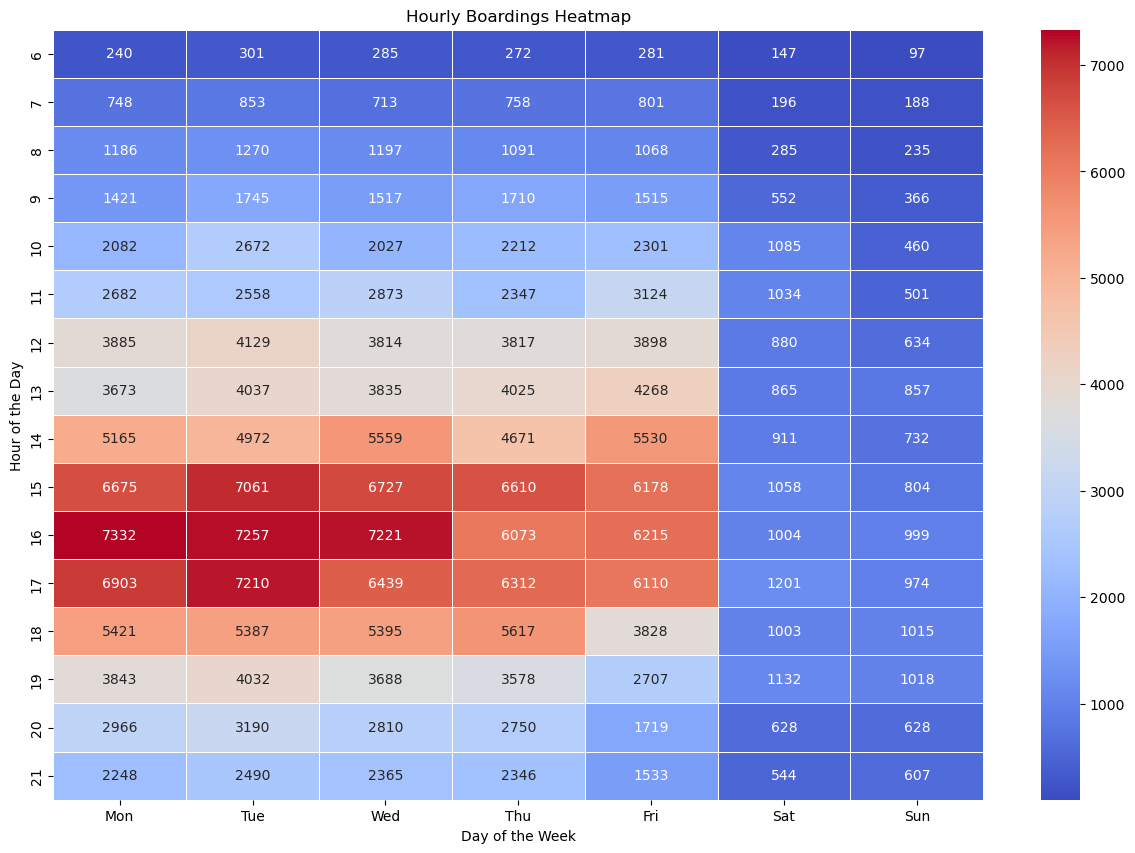

In [33]:
# Group by hour_of_day and day_of_week for boarding
grouped_boardings = cm.groupby(['hour_of_day', 'day_of_week']).boarding.sum().unstack().fillna(0)

# Weekdays ordering
weekdays_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

grouped_boardings = grouped_boardings[weekdays_order]

# Plot heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(grouped_boardings, cmap="coolwarm", linewidths=0.5, annot=True, fmt=".0f")
plt.title("Hourly Boardings Heatmap")
plt.ylabel("Hour of the Day")
plt.xlabel("Day of the Week")
plt.show()

<div class="alert alert-block alert-success"> 
<strong> Insights: </strong>
    
The Hourly Boarding Heatmap shows a clear pattern: from Monday to Thursday, the UT community's boarding peaks from 2 pm to 6 pm.<br>
By Friday, this trend shifts slightly earlier, with peak usage from 2 pm to 5 pm.<br>
This possibly indicates students and staff wrapping up their day earlier, eager for the weekend. <br>
And as one might anticipate, the weekends are significantly quieter, reflecting a campus at rest.

<div class="alert alert-block alert-success"> 
<strong> Hourly Ridership Heatmap :</strong> Similar to the above, but here, the color intensity indicates net ridership (boarding - alighting).<br>
Note that negative ridership figures in the context of our data indicate that more people alighted (got off) the bus than boarded (got on) during a given time window.

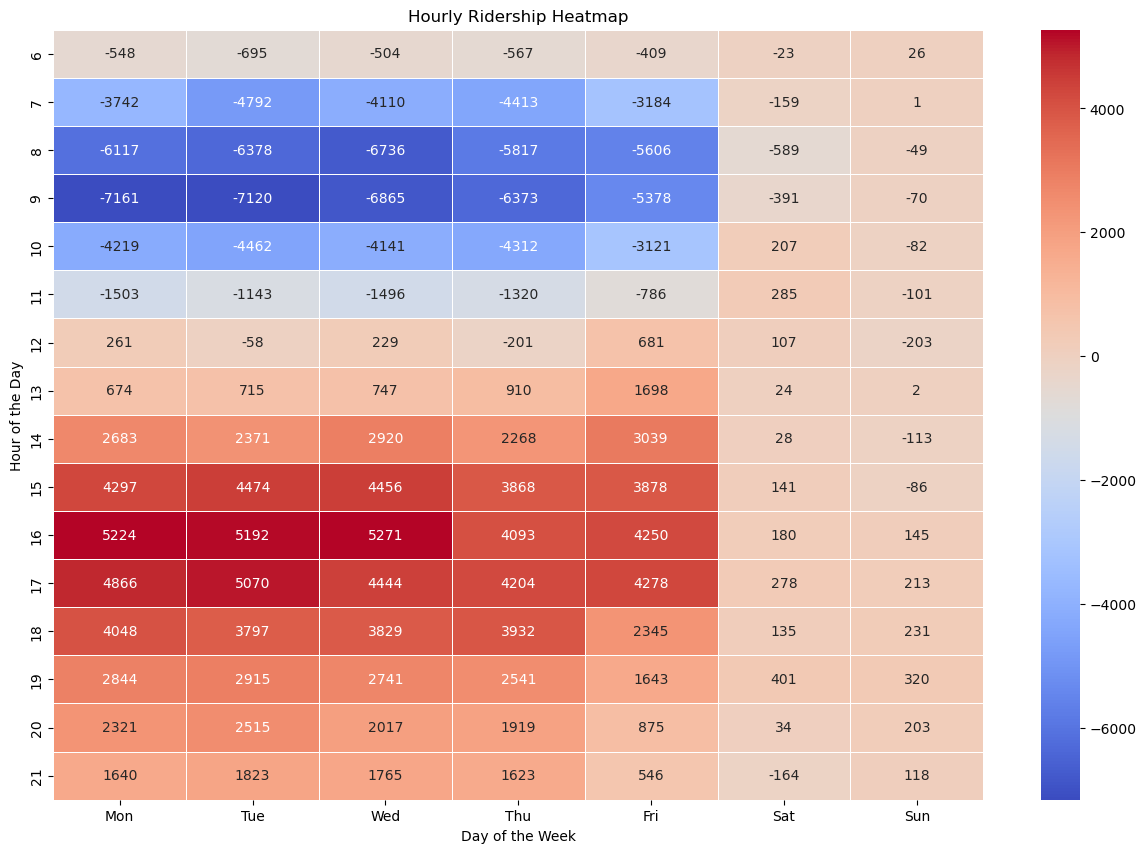

In [34]:
# Calculate net ridership
cm['net_ridership'] = cm['boarding'] - cm['alighting']

# Group by hour_of_day and day_of_week
grouped_nr = cm.groupby(['hour_of_day', 'day_of_week']).net_ridership.sum().unstack().fillna(0)


grouped_nr = grouped_nr[weekdays_order]

# Plot heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(grouped_nr, cmap="coolwarm", linewidths=0.5, annot=True, fmt=".0f")
plt.title("Hourly Ridership Heatmap")
plt.ylabel("Hour of the Day")
plt.xlabel("Day of the Week")
plt.show()

<div class="alert alert-block alert-success"> 
<strong> Insights: </strong>
    
The Hourly Ridership Heatmap further deepens this understanding.<br>
With the net ridership metric (boarding - alighting), it's evident that from Monday to Thursday, the busiest bus periods are from 2 pm to 8 pm.<br>
By Friday, this shifts to 1 pm to 7 pm.<br>
Again, weekends display minimal activity, which aligns with our boarding insights.

## 2. Temperature's subtle influence

<div class="alert alert-block alert-success"> 
<strong>Average Boardings and Temperature by hour of the day :</strong> 

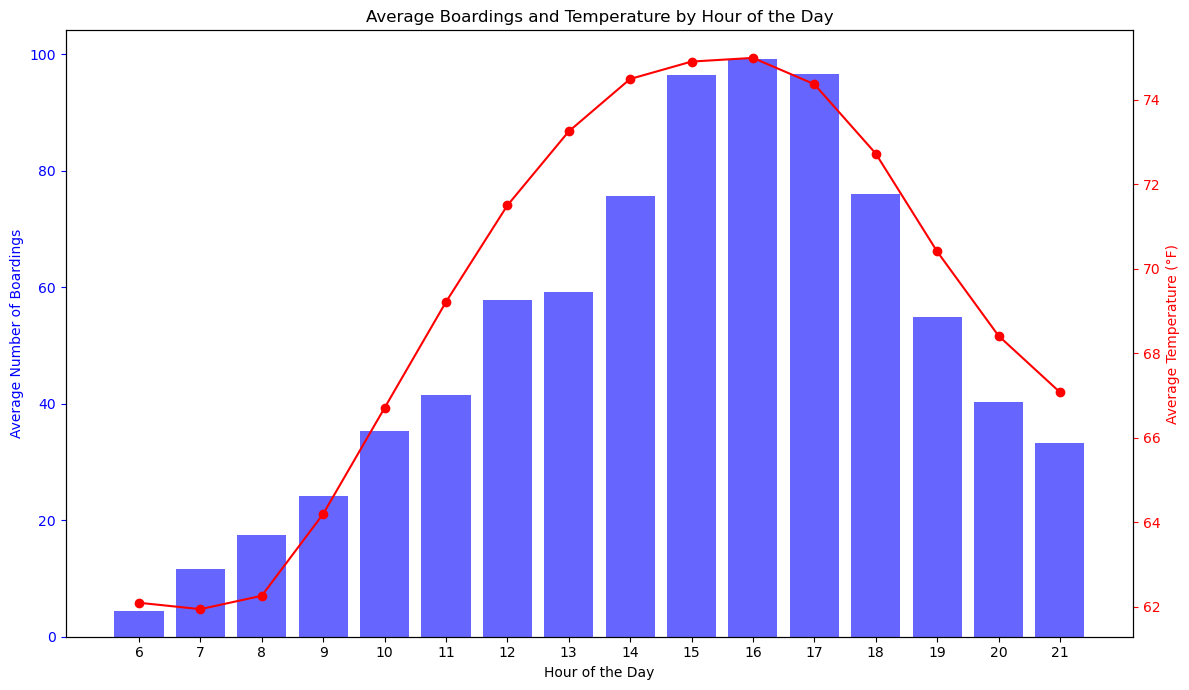

In [35]:
# Group by hour_of_day
grouped_hr = cm.groupby('hour_of_day').agg(avg_temp=('temperature', 'mean'), avg_boarding=('boarding', 'mean')).reset_index()

# Set up the figure and axes
fig, ax1 = plt.subplots(figsize=(12, 7))

# Plot average boardings on primary y-axis
ax1.bar(grouped_hr['hour_of_day'], grouped_hr['avg_boarding'], color='blue', alpha=0.6, label='Average Boardings')
ax1.set_xlabel('Hour of the Day')
ax1.set_ylabel('Average Number of Boardings', color='blue')
ax1.tick_params('y', colors='blue')
ax1.set_xticks(grouped_hr['hour_of_day'])  # To ensure all hours are shown

# Create the secondary y-axis to plot average temperature
ax2 = ax1.twinx()
ax2.plot(grouped_hr['hour_of_day'], grouped_hr['avg_temp'], color='red', marker='o', label='Average Temperature')
ax2.set_ylabel('Average Temperature (°F)', color='red')
ax2.tick_params('y', colors='red')

# Title and show the plot
plt.title('Average Boardings and Temperature by Hour of the Day')
plt.grid(False)
plt.tight_layout()
plt.show()


<div class="alert alert-block alert-success"> 
<strong> Insights: </strong><br>
    
The Average Boardings and Temperature by Hour of the Day uncovers an intriguing relationship.<br>
As the day progresses, the temperature tends to rise, peaking during midday. <br>
Concurrently, boardership also witnesses an uptick during these warmer hours. <br>
This mutual escalation gives an impression of a correlation between temperature and boardership. <br>
It's also possible that students and staff prefer to travel during the warmer parts of the day, or perhaps they're avoiding the chill of early mornings, especially during the fall semester. But given Austin's weather, that seems unlikely.

## 3. A Semester's Ebb and Flow

<div class="alert alert-block alert-success"> 
<strong>Average Boardings across Months :</strong> 

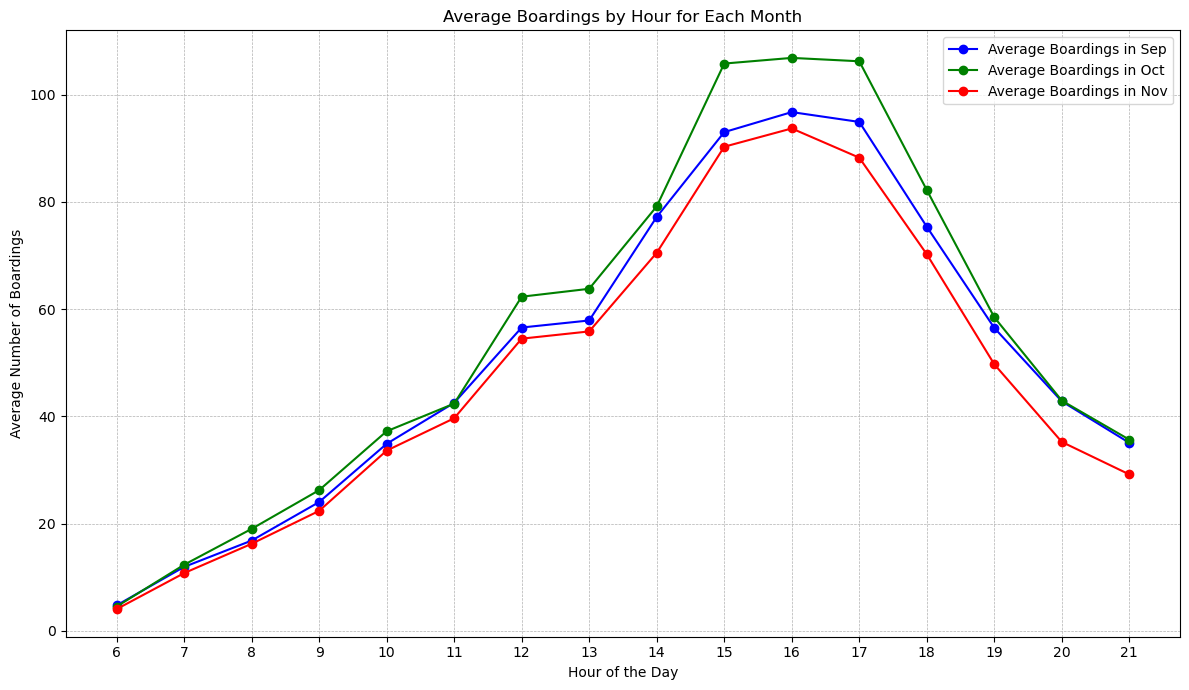

In [36]:
# Group by hour_of_day and month
grouped_hr_month = cm.groupby(['hour_of_day', 'month']).boarding.mean().unstack().reset_index()

# Set up the figure
plt.figure(figsize=(12, 7))

# Plot for each month
months = ['Sep', 'Oct', 'Nov']
colors = ['blue', 'green', 'red']

for month, color in zip(months, colors):
    plt.plot(grouped_hr_month['hour_of_day'], grouped_hr_month[month], color=color, marker='o', label=f'Average Boardings in {month}')

plt.xlabel('Hour of the Day')
plt.ylabel('Average Number of Boardings')
plt.title('Average Boardings by Hour for Each Month')
plt.xticks(grouped_hr_month['hour_of_day'])  # To ensure all hours are shown
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">
<strong> Insights: </strong><br>
As we transition through months, the Average Boardings across Months reveals an arc in bus usage.<br> Starting in September, the numbers rise in October, suggesting an increased reliance or familiarity with the bus system as the semester progresses. <br>
However, as November rolls around – perhaps as students bunker down for finals or projects – the numbers dip below even September levels.<br>
The distribution of boarding across hours of the day remains consistent across the months<br>

## 4. Day-to-Day Fluctuations: Workdays versus Weekends

<div class="alert alert-block alert-success"> 
<strong>Average Daily Boardings & Alightings : September to November

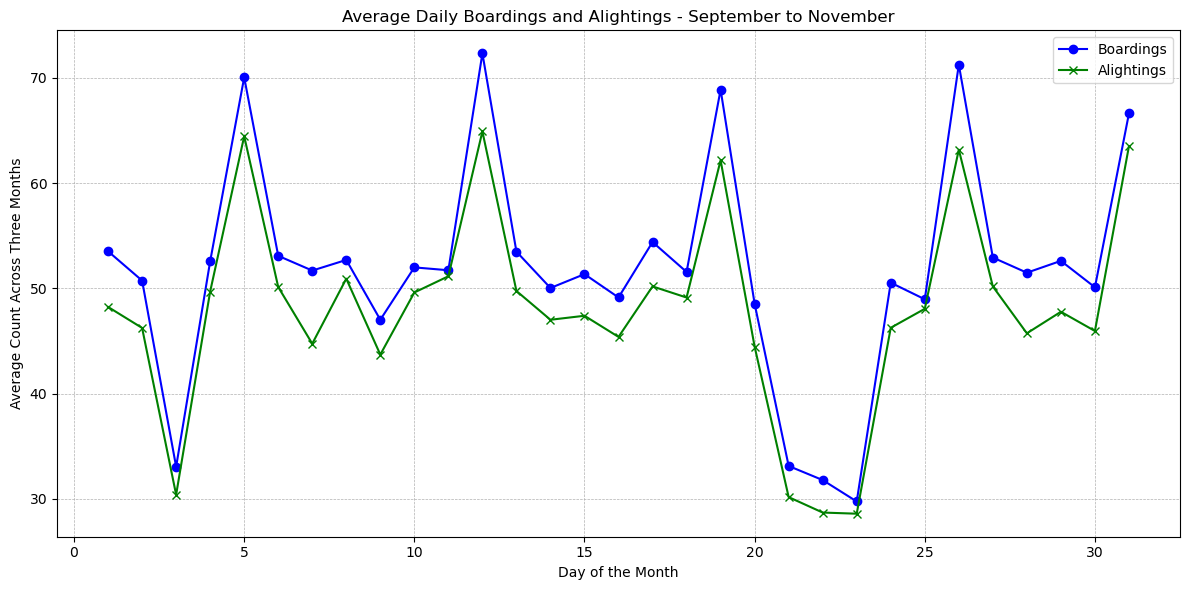

In [37]:
# Extract day from timestamp
cm['day'] = pd.to_datetime(cm['timestamp']).dt.day

# Group data by day only
grouped_day = cm.groupby(['day']).agg({'boarding': 'mean', 'alighting': 'mean'}).reset_index()

# Plotting
plt.figure(figsize=(12, 6))

# Line plot for boardings and alightings
plt.plot(grouped_day['day'], grouped_day['boarding'], label='Boardings', color='blue', marker='o')
plt.plot(grouped_day['day'], grouped_day['alighting'], label='Alightings', color='green', marker='x')

plt.xlabel('Day of the Month')
plt.ylabel('Average Count Across Three Months')
plt.title('Average Daily Boardings and Alightings - September to November')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">
<strong> Insights: </strong>
    
The Daily Boardings & Alightings from September to November shows a cyclical pattern. <br>
There's a clear increase in boardings during weekdays and a decrease during weekends.<br>
Additionally, there's a noticeable reduction in boardings during weekends at the end of each month. <br>
This drop could be attributed to long weekends, holidays, or students taking breaks.

<div class="alert alert-block alert-success">In conclusion, the Capital Metro data reveals distinct daily and monthly travel patterns at UT Austin during the fall semester, offering insights for transportation planning and campus activity.

# The Reuters corpus

Revisit the Reuters C50 text corpus that we briefly explored in class. Your task is simple: tell an interesting story, anchored in some analytical tools we have learned in this class, using this data. For example:

you could cluster authors or documents and tell a story about what you find.
you could look for common factors using PCA.
you could train a predictive model and assess its accuracy, constructing features for each document that maximize performance.
you could do anything else that strikes you as interesting with this data.
Describe clearly what question you are trying to answer, what models you are using, how you pre-processed the data, and so forth. Make sure you include at least one really interesting plot (although more than one might be necessary, depending on your question and approach.)

Format your write-up in the following sections, some of which might be quite short:

Question: What question(s) are you trying to answer?
Approach: What approach/statistical tool did you use to answer the questions?
Results: What evidence/results did your approach provide to answer the questions? (E.g. any numbers, tables, figures as appropriate.)
Conclusion: What are your conclusions about your questions? Provide a written interpretation of your results, understandable to stakeholders who might plausibly take an interest in this data set.
Regarding the data itself: In the C50train directory, you have 50 articles from each of 50 different authors (one author per directory). Then in the C50test directory, you have another 50 articles from each of those same 50 authors (again, one author per directory). This train/test split is obviously intended for building predictive models, but to repeat, you need not do that on this problem. You can tell any story you want using any methods you want. Just make it compelling!

Note: if you try to build a predictive model, you will need to figure out a way to deal with words in the test set that you never saw in the training set. This is a nontrivial aspect of the modeling exercise. (E.g. you might simply ignore those new words.)

This question will be graded according to three criteria:

the overall "interesting-ness" of your question and analysis.
the clarity of your description. We will be asking ourselves: could your analysis be reproduced by a competent data scientist based on what you've said? (That's good.) Or would that person have to wade into the code in order to understand what, precisely, you've done? (That's bad.)
technical correctness (i.e. did you make any mistakes in execution or interpretation?)

<div class="alert alert-block alert-success"> Historically, journalism has been dominated by male voices, often influencing the headlines, bylines, and the core narratives. But as times have evolved, more women have entered the scene, bringing fresh perspectives and challenging the status quo. Despite these strides, we're compelled to ask: Does an undercurrent of bias still prevail?<br>
    
To answer this, our EDA phase aims to draw distinctions between articles penned by male and female authors. We're curious: Are there noticeable differences in article lengths, the sentiments conveyed, the choice of pivotal words, or even the geographical regions highlighted? 

But it doesn't stop at just observations. We've ventured into predictive modeling, aiming to determine an author's gender purely based on their writing style and content. Here's where it gets interesting: if our model exhibits high accuracy, it might suggest that there are still distinct male and female "styles" in journalism. This ties back to our overarching question – in a field historically led by men, are the footprints of past biases still evident in today's narratives?

<div class="alert alert-block alert-success"> Using the os library to navigate through directories and read files. Reading in the Train and Test folders.

## Data Preprocessing

In [38]:
import os

def load_data(path):
    data = {}

    for author_dir in os.listdir(path):
        author_path = os.path.join(path, author_dir)
        
        if os.path.isdir(author_path):
            author_articles = []
            
            for filename in os.listdir(author_path):
                with open(os.path.join(author_path, filename), 'r', encoding='utf-8', errors='ignore') as file:
                    content = file.read()
                    author_articles.append(content)
            
            data[author_dir] = author_articles
    
    return data

# Load the training dataset using the load_data function.
train_data = load_data('ReutersC50/C50train')

# Load the testing dataset using the same function.
test_data = load_data('ReutersC50/C50test')

 <div class="alert alert-block alert-success"> The Reuters C50 data does not contain any information regarding the authors' genders but thanks to the fact that all 50 journalists in the dataset are well-known figures, we were able to map authors to gender using their name and a little bit of research.

In [39]:
# Create a dictionary to manually map authors to genders
author_gender_mapping = {
    'AaronPressman': 'male',
    'RobinSidel': 'female',
    'LynnleyBrowning': 'female',
    'KouroshKarimkhany': 'male',
    'MichaelConnor': 'male',
    'JoeOrtiz': 'male',
    'EricAuchard': 'male',
    'SimonCowell': 'male',
    "LynneO'Donnell": 'female',
    'EdnaFernandes': 'female',
    'KevinMorrison': 'male',
    'SamuelPerry': 'male',
    'PatriciaCommins': 'female',
    'JohnMastrini': 'male',
    'JanLopatka': 'male',
    'KevinDrawbaugh': 'male',
    'KarlPenhaul': 'male',
    'MartinWolk': 'male',
    'ScottHillis': 'male',
    'DavidLawder': 'male',
    'FumikoFujisaki': 'female',
    'MarcelMichelson': 'male',
    'NickLouth': 'male',
    'DarrenSchuettler': 'male',
    'WilliamKazer': 'male',
    'TanEeLyn': 'female',
    'PierreTran': 'male',
    'HeatherScoffield': 'female',
    'MureDickie': 'male',
    'RogerFillion': 'male',
    'JimGilchrist': 'male',
    'BradDorfman': 'male',
    'AlanCrosby': 'male',
    'JonathanBirt': 'male',
    'BenjaminKangLim': 'male',
    'TheresePoletti': 'female',
    'KeithWeir': 'male',
    'JoWinterbottom': 'female',
    'MarkBendeich': 'male',
    'JaneMacartney': 'female',
    'MatthewBunce': 'male',
    'ToddNissen': 'male',
    'PeterHumphrey': 'male',
    'TimFarrand': 'male',
    'SarahDavison': 'female',
    'GrahamEarnshaw': 'male',
    'BernardHickey': 'male',
    'KirstinRidley': 'female',
    'AlexanderSmith': 'male',
    'LydiaZajc': 'female'
}

<div class="alert alert-block alert-success"> Preprocessing the data in Train and Test before starting our analysis. This includes converting to lowercase, lemmatizing, removing stop words and making sure that alphanumeric characters are not included.<br>
Note that we have added additional stopwords to what is already provided by the nltk library.

In [40]:
# Download required resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def preprocess_text(text):
    lemmatizer = WordNetLemmatizer()
    additional_stopwords = ["said", "mr", "mrs", "ms","also","new","year","would","one"]  # Additional stop words
    stop_words = set(stopwords.words('english') + additional_stopwords)
    return ' '.join([lemmatizer.lemmatize(word) for word in word_tokenize(text.lower()) if word.isalpha() and word not in stop_words])

def preprocess_data(data):
    preprocessed_data = {}
    for author, articles in data.items():
        preprocessed_articles = [preprocess_text(article) for article in articles]
        preprocessed_data[author] = preprocessed_articles
    return preprocessed_data

train_data_prep = preprocess_data(train_data)
test_data_prep = preprocess_data(test_data)

[nltk_data] Downloading package punkt to /Users/barnana/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/barnana/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/barnana/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


<div class="alert alert-block alert-success"> Using the author_gender_mapping dictionary,we create labels for Train and Test data.

In [41]:
def convert_to_lists(data, gender_mapping):
    articles = []
    genders = []
    
    for author, author_articles in data.items():
        for article in author_articles:
            articles.append(article)
            genders.append(gender_mapping[author])
    
    return articles, genders

train_articles, train_labels = convert_to_lists(train_data_prep, author_gender_mapping)
test_articles, test_labels = convert_to_lists(test_data_prep, author_gender_mapping)

# Convert labels to 1 for female and 0 for male
train_labels = [1 if label == 'female' else 0 for label in train_labels]
test_labels = [1 if label == 'female' else 0 for label in test_labels]

<div class="alert alert-block alert-success"> Before we start our EDA, we are combining the Train and Test data because we want to perform EDA on the entire dataset not just Train.

In [42]:
# Combine articles
combined_articles = train_articles + test_articles

# Combine labels
combined_labels = train_labels + test_labels

print(len(combined_articles))  
print(len(combined_labels))    

5000
5000


## Exploratory Data Analysis

<div class="alert alert-block alert-success"> We're conducting exploratory data analysis (EDA) to find differences in articles written by male and female authors. This can reveal potential biases. Here, we'll search for bias evidence, and later, in the conclusion, discuss reasons for these findings.

<div class="alert alert-block alert-success"> 
<strong>1. Article Distribution by Gender:</strong><br>
Studying how articles are split between male and female authors helps us understand gender representation. If there's an uneven distribution, it might suggest biases in content or author demographics. This baseline is crucial for later comparisons. A balanced split shows fairness, while differences prompt a closer look for potential gender-related journalism biases.

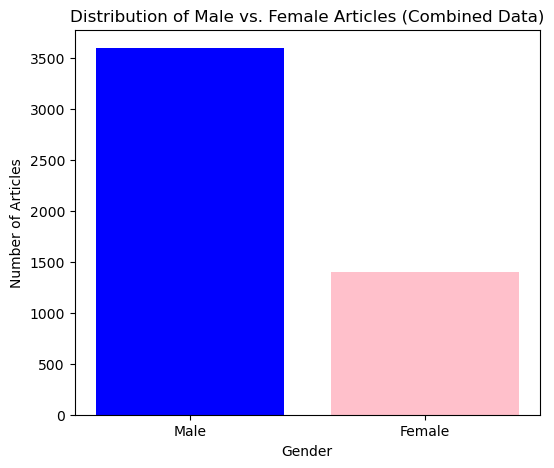

In [43]:
# Distribution of Male vs. Female Articles for Combined Data
combined_gender_counts = [combined_labels.count(0), combined_labels.count(1)]
labels = ['Male', 'Female']

plt.figure(figsize=(6, 5))
plt.bar(labels, combined_gender_counts, color=['blue', 'pink'])
plt.xlabel('Gender')
plt.ylabel('Number of Articles')
plt.title('Distribution of Male vs. Female Articles (Combined Data)')
plt.show()

<div class="alert alert-block alert-success"> The data reveals a significant disparity, with a disproportionately higher number of articles authored by men. In fact, articles written by women account for less than half of the total articles produced by their male counterparts. The notable difference in article contributions between genders hints at the presence of underlying biases that impact authorship opportunities and representation.

<div class="alert alert-block alert-success">
<strong>2. Word count distribution by Gender:</strong><br>
We examine word count patterns in articles by male and female authors to detect potential biases. Differences might indicate unequal content allocation, with longer male-authored articles possibly receiving more space or covering broader topics. Conversely, shorter female-authored articles could imply limited assignments. 

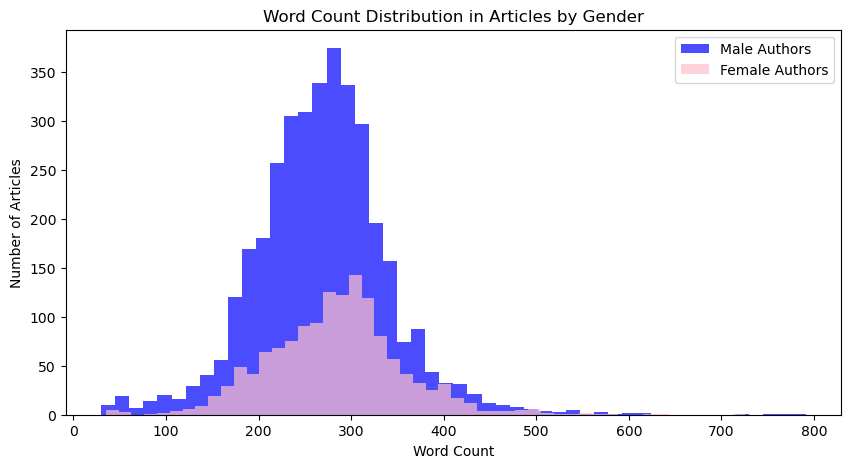

In [44]:
# Extracting word counts for articles written by male and female authors
male_word_counts = [len(article.split()) for i, article in enumerate(combined_articles) if combined_labels[i] == 0]
female_word_counts = [len(article.split()) for i, article in enumerate(combined_articles) if combined_labels[i] == 1]

# Plotting the distributions
plt.figure(figsize=(10, 5))

plt.hist(male_word_counts, bins=50, color='blue', alpha=0.7, label='Male Authors')
plt.hist(female_word_counts, bins=50, color='pink', alpha=0.7, label='Female Authors')

plt.xlabel('Word Count')
plt.ylabel('Number of Articles')
plt.title('Word Count Distribution in Articles by Gender')
plt.legend(loc='upper right')

plt.show()

<div class="alert alert-block alert-success">There does not appear to be a significant difference in terms of distribution for both genders. The histogram only looks starkly different because so many more articles are written by men. If we focus just on the distribution, it does not look very differently skewed for the two genders. The peaks and troughs of both distributions appear at roughly the same places. To confirm this, we will look at the average length of each article (in words) by gender next.

<div class="alert alert-block alert-success">
<strong>3. Average Article Length by Gender:</strong>
Analyzing average article length reveals potential gaps in content depth or assigned space for male and female authors. Based on what we observed in the histogram above, we do not expect to see a significant difference in average article length across the genders.

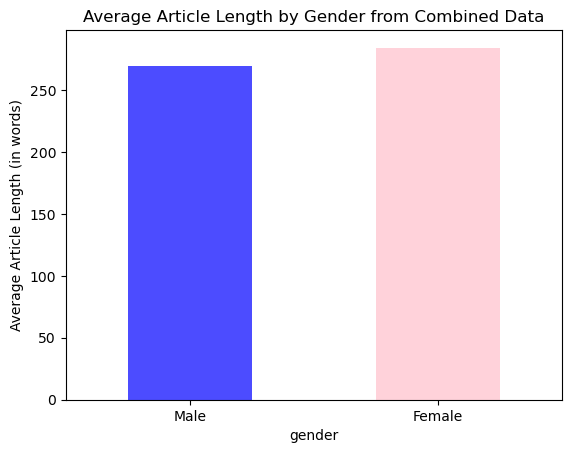

In [45]:
# Convert articles and labels from combined data to a dataframe
combined_df = pd.DataFrame({
    'article': combined_articles,
    'gender': combined_labels
})

# Compute the length of each article
combined_df['length'] = combined_df['article'].apply(lambda x: len(x.split()))

# Group by gender and compute average length
combined_avg_lengths = combined_df.groupby('gender')['length'].mean()

# Map the gender labels for visualization
gender_labels = {0: 'Male', 1: 'Female'}
combined_avg_lengths.index = combined_avg_lengths.index.map(gender_labels)

# Plot
combined_avg_lengths.plot(kind='bar', color=['blue', 'pink'], alpha=0.7)
plt.ylabel('Average Article Length (in words)')
plt.title('Average Article Length by Gender from Combined Data')
plt.xticks(rotation=0)
plt.show()

<div class="alert alert-block alert-success">As anticipated from the histogram shown earlier, there isn't a significant difference between the average article lengths for men and women. In fact, the average article length for female authors is slightly longer. This is good news! It challenges our initial hypothesis that there might be unequal content distribution and fewer assignments for female journalists.

<div class="alert alert-block alert-success">
<strong>4. Sentiment Distribution by Gender: </strong><br>
Sentiment analysis offers insights into the emotional tone and mood conveyed in articles. By comparing sentiment scores between male and female authors, we aim to identify if there exists a consistent, distinct tone associated with either gender. For instance, are articles by female authors generally more positive or negative compared to their male counterparts? This could indicate implicit biases or societal influences in how different genders approach topics, or it might reflect the kinds of assignments given to authors based on their gender. 

<div class="alert alert-block alert-success">Please note that the sentiment scores range from -1 to 1, with negative values indicating a negative sentiment, positive values indicating a positive sentiment, and values close to 0 suggesting neutral sentiment.

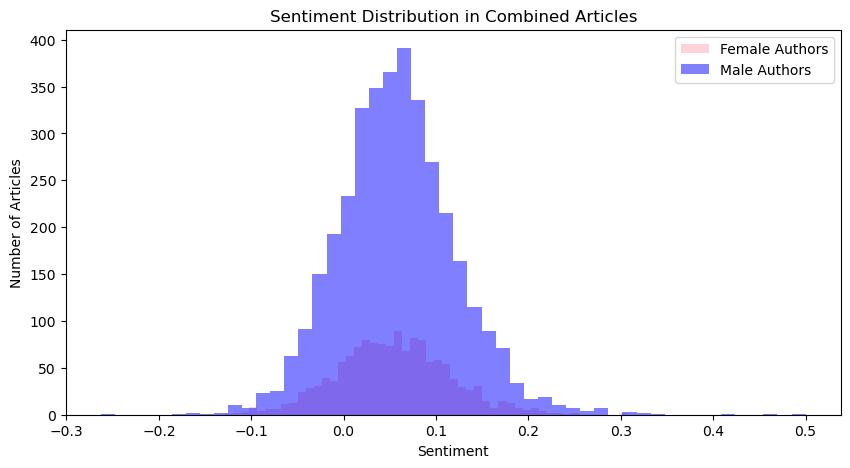

In [46]:
# Sentiment Analysis Distribution using combined data
combined_female_sentiments = [TextBlob(article).sentiment.polarity for i, article in enumerate(combined_articles) if combined_labels[i] == 1]
combined_male_sentiments = [TextBlob(article).sentiment.polarity for i, article in enumerate(combined_articles) if combined_labels[i] == 0]

plt.figure(figsize=(10, 5))
plt.hist(combined_female_sentiments, bins=50, color='pink', alpha=0.7, label='Female Authors')
plt.hist(combined_male_sentiments, bins=50, color='blue', alpha=0.5, label='Male Authors')
plt.xlabel('Sentiment')
plt.ylabel('Number of Articles')
plt.title('Sentiment Distribution in Combined Articles')
plt.legend(loc='upper right')
plt.show()

<div class="alert alert-block alert-success">Similar to the word count distribution histogram, there does not appear to be a substantial difference in how male and female authors approach various subjects. If we focus purely on the distribution aspect of this histogram, it does not look very differently skewed for the two genders. It only looks starkly different because of the fact that men author a much larger number of articles. To confirm this, we will look at the average sentiment scores for each gender next.

<div class="alert alert-block alert-success">
<strong>5. Average Sentiment Scores by Gender: </strong><br>

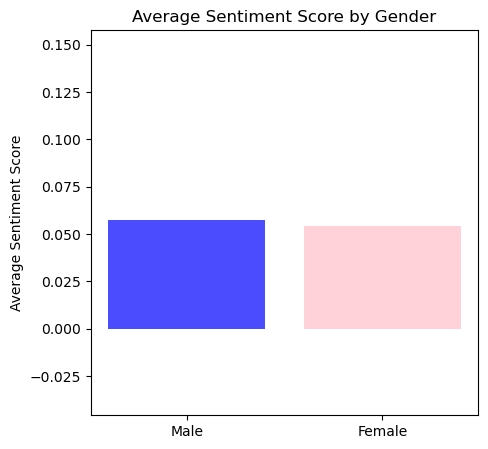

In [47]:
# Calculating the average sentiment scores for each gender
avg_female_sentiment = np.mean(combined_female_sentiments)
avg_male_sentiment = np.mean(combined_male_sentiments)

# Values and Labels for plotting
avg_sentiment_values = [avg_male_sentiment, avg_female_sentiment]
gender_labels = ['Male', 'Female']

# Plotting the averages
plt.figure(figsize=(5, 5))
plt.bar(gender_labels, avg_sentiment_values, color=['blue', 'pink'], alpha=0.7)
plt.ylabel('Average Sentiment Score')
plt.title('Average Sentiment Score by Gender')
plt.ylim(min(avg_sentiment_values) - 0.1, max(avg_sentiment_values) + 0.1)
plt.show()

<div class="alert alert-block alert-success">As expected, there are no systematic differences in tone across genders. Both genders seem to approach their respective subjects with similar degrees of positivity. This also means that there is no evidence to back up our initial suspicion that topics might be assigned to journalists on the basis of their gender.

<div class="alert alert-block alert-success">
<strong>6. Mention of Numbers and Statistics:</strong><br>
Our goal is to examine if there are gender-related differences in the use of data-driven arguments in articles.
We use a function that scans each article's content to identify and tally various quantitative components:<br>
    
 - Explicit numeric values
 - Numeric words like "million","percent","hundred", etc.
 - Specific data-related terms such as "correlation","growth","chart", etc.
 - Numeric words that are transformed into actual numbers using the word2number library 

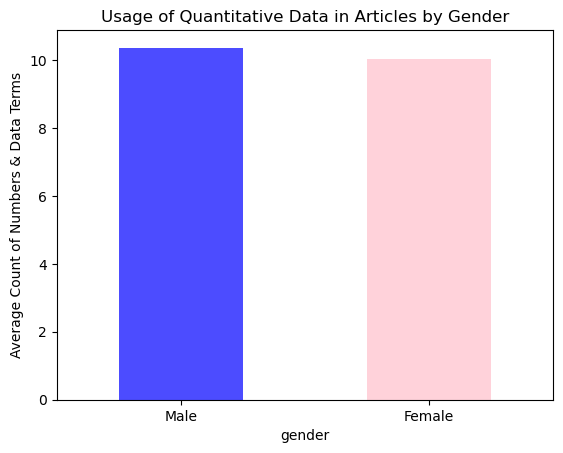

In [48]:
from word2number import w2n
import re
import pandas as pd
import matplotlib.pyplot as plt

# Function to find numbers in articles
def count_numbers(text):
    count = 0
    words = text.split()
    
    # Counting explicit numeric values
    count += len(re.findall(r'\b\d+\b', text))
    
    # Counting numeric words & specific terms
    data_terms = ["million", "billion", "percent", "trillion", "thousand", "hundred", "ratio", "fraction", "average",
              "median", "mode", "standard deviation", "variance", "p-value", "correlation", "statistic", "probability", 
              "sample", "population", "study", "survey", "research", "analysis", "dataset", "figure", "table", 
              "chart", "graph", "percentage", "increase", "decrease", "growth", "trend", "rate", "measure", "estimate", 
              "projection"]

    for word in words:
        if word.lower() in data_terms:
            count += 1
        else:
            try:
                _ = w2n.word_to_num(word)
                count += 1
            except:
                continue
    return count

# Assuming combined_articles and combined_labels are your combined data
df = pd.DataFrame({
    'article': combined_articles,
    'gender': combined_labels
})

# Extract numbers using the function
df['num_count'] = df['article'].apply(count_numbers)

# Compute average count of numbers by gender
avg_num_counts = df.groupby('gender')['num_count'].mean()

# Map the gender labels for visualization
gender_labels = {0: 'Male', 1: 'Female'}
avg_num_counts.index = avg_num_counts.index.map(gender_labels)

# Plot
avg_num_counts.plot(kind='bar', color=['blue', 'pink'], alpha=0.7)
plt.ylabel('Average Count of Numbers & Data Terms')
plt.title('Usage of Quantitative Data in Articles by Gender')
plt.xticks(rotation=0)
plt.show()

<div class="alert alert-block alert-success">According to the bar plot above, no gender is more likely than the other to invoke numbers and statistics. This means that articles written by men and women are backed by similar levels of data and statistical analysis.

<div class="alert alert-block alert-success">
<strong>8. Average Readability Scores by Gender: </strong> <br> 
We aim to identify patterns in the writing complexity between male and female authors. If we notice a distinct difference in the average score between genders, it could hint at inherent disparities in writing styles or possibly the nature of topics each gender is covering. It's essential, however, to avoid jumping to conclusions. Differences in readability don't necessarily imply differences in content quality or depth. 

<div class="alert alert-block alert-success">The Flesch-Kincaid readability test is a tool that gauges the accessibility of written content. By assigning a numerical score, it reflects the ease (or challenge) of reading and understanding a text. Typically, a higher score suggests that the content is more straightforward and accessible, while a lower score indicates a more complex, demanding text.

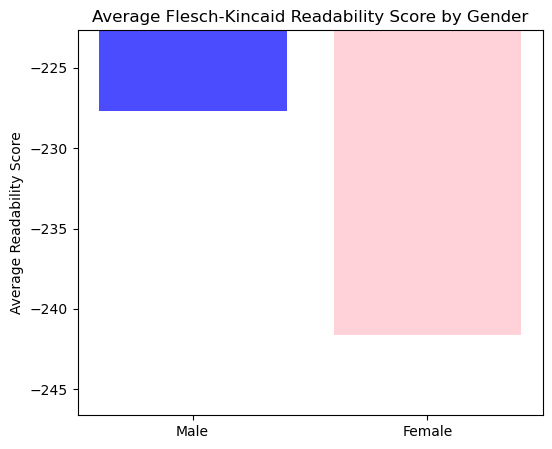

In [49]:
import textstat

# Using the combined articles and labels
female_readability = [textstat.flesch_reading_ease(article) for i, article in enumerate(combined_articles) if combined_labels[i] == 1]
male_readability = [textstat.flesch_reading_ease(article) for i, article in enumerate(combined_articles) if combined_labels[i] == 0]

# Calculating the average readability scores for each gender
avg_female_readability = np.mean(female_readability)
avg_male_readability = np.mean(male_readability)

# Values and Labels for plotting
avg_readability_values = [avg_male_readability, avg_female_readability]
gender_labels = ['Male', 'Female']

# Plotting the averages
plt.figure(figsize=(6, 5))
plt.bar(gender_labels, avg_readability_values, color=['blue', 'pink'], alpha=0.7)
plt.ylabel('Average Readability Score')
plt.title('Average Flesch-Kincaid Readability Score by Gender')
plt.ylim(min(avg_readability_values) - 5, max(avg_readability_values) + 5)  # Adjusting the y-axis limits for clarity
plt.show()

<div class="alert alert-block alert-success">From the barplot above, we can see that the distribution of readability scores are substantially different for male and female authors. The Readability score for female authors is much lower implying that female authors tend to write more complex articles that are more demanding of the reader.

<div class="alert alert-block alert-success">
<strong>9. Exploring Vocabulary Size by gender:</strong><br>
We measure the unique words used by male and female authors. A greater vocabulary might indicate a wider range of topics or a richer linguistic style.

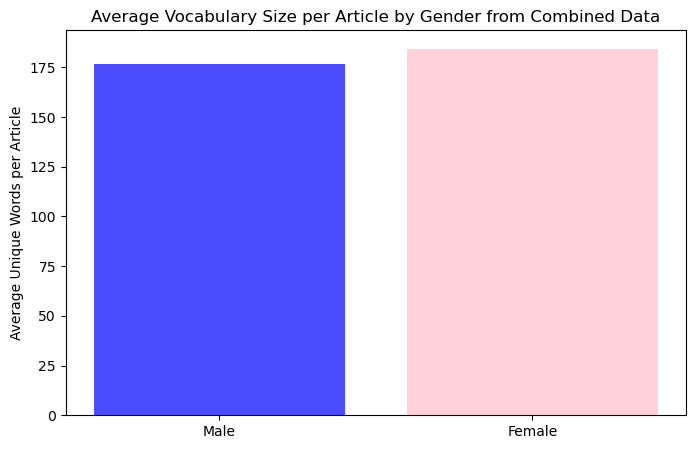

In [50]:
# Extract articles for each gender from the combined data
female_articles_combined = [article for i, article in enumerate(combined_articles) if combined_labels[i] == 1]
male_articles_combined = [article for i, article in enumerate(combined_articles) if combined_labels[i] == 0]

# Calculate average vocabulary size per article for each gender
female_avg_vocab_per_article = np.mean([len(set(article.split())) for article in female_articles_combined])
male_avg_vocab_per_article = np.mean([len(set(article.split())) for article in male_articles_combined])

# Values and Labels for plotting
avg_vocab_values = [male_avg_vocab_per_article, female_avg_vocab_per_article]
gender_labels = ['Male', 'Female']

# Plotting
plt.figure(figsize=(8, 5))
plt.bar(gender_labels, avg_vocab_values, color=['blue', 'pink'], alpha=0.7)
plt.ylabel('Average Unique Words per Article')
plt.title('Average Vocabulary Size per Article by Gender from Combined Data')
plt.show()

<div class="alert alert-block alert-success"> The barplot above demonstrates no significant differences in vocabularies of male and female authors. This means that the number of unique words used per article, on an average, is almost the same for the two genders.

<div class="alert alert-block alert-success">
<strong>Conclusion from EDA:</strong><br>
The exploratory data analysis aimed to unveil any potential biases in journalism based on the gender of authors. The results paint a multifaceted picture. While there is a clear disparity in the number of articles written by male and female authors, suggesting a potential bias in authorship opportunities or representation, other metrics such as word count, sentiment, use of numbers and statistics, and vocabulary size show little to no difference between the genders. These observations indicate that, once given an opportunity, female authors contribute with similar depth, rigor, and linguistic richness as their male counterparts. However, the disparity in readability scores, with female authors tending to write more complex articles, hints at potential differences in writing styles or the nature of topics covered. Overall, while the initial distribution of articles suggests potential gender biases in journalistic opportunities, the content analysis largely dispels the notion of any systemic qualitative disparities in contributions between male and female authors.

## Predictive Model

<div class="alert alert-block alert-success">Now we move on to our predictive model where we will try to predict the gender of the author based on the contents of articles.

<div class="alert alert-block alert-success">
<strong>Feature Extraction:</strong><br>
In this code, we are processing the data by transforming unprocessed article texts into the following set of features can then serve as inputs for our machine learning model - <br>
    
 - Word Count
 - Average Word Length
 - Lexical Diversity (the ratio of unique words to the total number of words in the article)
 - Pronoun Usage
 - Frequency of the Top 50 Common Words 
 - Average Sentence Length 
 - Part-of-Speech (POS) Tagging: noun_count, verb_count, adj_count, adv_count
 - Passive Voice Usage 
 - Flesch Reading Ease Score

In [52]:
import nltk
from nltk import pos_tag
from nltk.tokenize import word_tokenize, sent_tokenize
import textstat 

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

def feature_extraction(texts):
    features = []
    
    for text in texts:
        feature = {}
        tokens = nltk.word_tokenize(text)
        sentences = nltk.sent_tokenize(text)
        pos_tags = pos_tag(tokens)
        
        # Total word count
        feature["word_count"] = len(tokens)
        
        # Average word length
        feature["avg_word_len"] = sum(len(word) for word in tokens) / len(tokens)
        
        # Lexical diversity
        feature["lexical_diversity"] = len(set(tokens)) / len(tokens)
        
        # Use of pronouns
        feature["pronoun_he"] = tokens.count("he")
        feature["pronoun_she"] = tokens.count("she")
        feature["pronoun_his"] = tokens.count("his")
        feature["pronoun_her"] = tokens.count("her")
        feature["pronoun_himself"] = tokens.count("himself")
        feature["pronoun_herself"] = tokens.count("herself")
        
        # Frequency of the top 50 common words
        common_words = [word for word, freq in Counter(" ".join(texts).split()).most_common(50)]
        for word in common_words:
            feature[f"word_freq_{word}"] = tokens.count(word)
        
        # Average sentence length
        feature["avg_sent_len"] = sum(len(nltk.word_tokenize(sent)) for sent in sentences) / len(sentences)
        
        # POS tagging
        feature["noun_count"] = sum(1 for word, pos in pos_tags if pos.startswith('N'))
        feature["verb_count"] = sum(1 for word, pos in pos_tags if pos.startswith('V'))
        feature["adj_count"] = sum(1 for word, pos in pos_tags if pos.startswith('J'))
        feature["adv_count"] = sum(1 for word, pos in pos_tags if pos.startswith('R'))
        
        # Passive voice usage
        feature["passive_voice"] = sum(1 for i in range(len(tokens) - 1) if tokens[i] == "was" or tokens[i] == "were" and tokens[i+1] in [word.name().split('.', 1)[0] for word in list(wn.all_synsets('v'))])
        
        # Flesch reading ease score
        feature["flesch_reading"] = textstat.flesch_reading_ease(text)
        
        features.append(feature)
    
    return features

# Extract features from the articles
X_train = feature_extraction(train_articles)
X_test = feature_extraction(test_articles)

[nltk_data] Downloading package punkt to /Users/barnana/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/barnana/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


<div class="alert alert-block alert-success"> We convert our feature dictionaries into vectors, fit a Random Forest model and print results.

<div class="alert alert-block alert-success"> We are addressing the class imbalance problem in our data through the class_weight parameter in the Random Forest classifier.<br>
With imbalanced data like ours, models might be biased towards the majority class. Class weights provide a mechanism to address class imbalance by assigning different importance levels to classes during the training of a machine learning model.By setting class weights, the model is "penalized" more for incorrectly predicting the minority class, making it more attentive to it. Specifically, when class weights are set to 'balanced', the weights are computed based on the inverse of class frequencies. This ensures that the minority class, despite being underrepresented, is given significant importance during training, leading to a more balanced and fair model.

In [53]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report

# Convert feature dictionaries into feature vectors
vectorizer = DictVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced']  # handle class imbalance
}

# Initialize the Random Forest classifier
clf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(clf, param_grid, cv=5, n_jobs=-1)

# Fit the model
grid_search.fit(X_train_vec, train_labels)

# Get the best estimator from the grid search
best_clf = grid_search.best_estimator_

# Predict on the test set using the best model
predicted_labels = best_clf.predict(X_test_vec)

# Evaluate the model's accuracy
accuracy = accuracy_score(test_labels, predicted_labels)
print(f"Accuracy: {accuracy:.2f}")

# Display detailed classification report
report = classification_report(test_labels, predicted_labels)
print(report)

# Additionally, evaluate cross-validation score for the best model on the training data
cv_scores = cross_val_score(best_clf, X_train_vec, train_labels, cv=5)
print(f"Mean CV Score: {cv_scores.mean():.2f}")

Accuracy: 0.76
              precision    recall  f1-score   support

           0       0.76      0.98      0.86      1800
           1       0.78      0.21      0.33       700

    accuracy                           0.76      2500
   macro avg       0.77      0.60      0.60      2500
weighted avg       0.77      0.76      0.71      2500

Mean CV Score: 0.69


<div class="alert alert-block alert-success">
<strong>Results : </strong><br>
<strong>Overall Accuracy & Class Representation:</strong> The model achieved an overall accuracy of 76%. However, a closer look at class-specific metrics reveals a pronounced disparity in the model's performance between male and female authors.<br>

<strong>Male Author Detection:</strong>
The model exhibits a high recall of 98% for male authors. This indicates that the model correctly identifies 98% of the articles penned by male authors. Such a performance might stem from the fact that male-authored articles have a dominant presence in the dataset, leading the model to learn their characteristics more confidently.<br>

<strong>Female Author Detection:</strong>
The recall for female authors stands at a mere 21%. This metric underscores that, out of all the articles authored by females, the model correctly pinpoints them as female-authored only 21% of the time. Such a result is alarming and implies the model's difficulty in discerning articles written by females. On the brighter side, the model's precision for female authors is 78%, signifying that when the model does label an article as female-authored, it gets it right 78% of the time. Nevertheless, considering the low recall, it's evident that the model is overly cautious when predicting female authors, often missing out on several genuine instances. <br>
    
Furthermore, the mean cross-validation score of 0.69 suggests that, on average, the model's performance might vary across different partitions of the data, further emphasizing the need for more robust model tuning or feature engineering.

<div class="alert alert-block alert-success">
<strong>Next Steps : </strong><br>
To make the model better, we can do a few things. First, get more data, especially from female authors, to balance things out. We can also tweak the features, like looking at smaller language details or the article topics, to make the model sharper. Trying out fancier models or using a mix of them might make predictions more accurate. To prevent overfitting, we can use tricks to smooth out the model. 

<div class="alert alert-block alert-success">
<strong>Conclusion : </strong><br>
In conclusion, while some variations exist, they're not consistently reliable for accurately predicting an author's gender based solely on content. Individual differences, evolving language, context, and societal changes all contribute to this complexity. Therefore, gender prediction from writing should be approached with caution and awareness of the limitations and nuances involved.

# Clustering and dimensionality reduction

The data in wine.csv contains information on 11 chemical properties of 6500 different bottles of vinho verde wine from northern Portugal. In addition, two other variables about each wine are recorded:

whether the wine is red or white
the quality of the wine, as judged on a 1-10 scale by a panel of certified wine snobs.
Run PCA, tSNE, and any clustering algorithm of your choice on the 11 chemical properties (or suitable transformations thereof) and summarize your results. Which dimensionality reduction technique makes the most sense to you for this data? Convince yourself (and me) that your chosen approach is easily capable of distinguishing the reds from the whites, using only the "unsupervised" information contained in the data on chemical properties. Does your unsupervised technique also seem capable of distinguishing the higher from the lower quality wines? Present appropriate numerical and/or visual evidence to support your conclusions.

To clarify: I'm not asking you to run a supervised learning algorithms. Rather, I'm asking you to see whether the differences in the labels (red/white and quality score) emerge naturally from applying an unsupervised technique to the chemical properties. This should be straightforward to assess using plots.

In [54]:
wine=pd.read_csv('wine.csv')
wine.head(20)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,red
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,red
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,red
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,red
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,red


<div class="alert alert-block alert-success"> Understanding and preprocessing the data

In [55]:
# Check for duplicates
duplicate_rows = wine[wine.duplicated()]
print("Number of duplicate rows:", duplicate_rows.shape[0])

# Find and display all duplicate rows with all duplicate entries
duplicate_rows = wine[wine.duplicated(keep=False)]
print("Duplicate Rows with All Duplicates:")
duplicate_rows

Number of duplicate rows: 1177
Duplicate Rows with All Duplicates:


,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,color
0,7.40,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.400000,5,red
4,7.40,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.400000,5,red
9,7.50,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.500000,5,red
11,7.50,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.500000,5,red
22,7.90,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.500000,5,red
27,7.90,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.500000,5,red
39,7.30,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.500000,5,red
40,7.30,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.500000,5,red
64,7.20,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.900000,5,red
65,7.20,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.900000,5,red


In [56]:
# Remove duplicates and reset the index
wine.drop_duplicates(inplace=True, keep='first')
wine.reset_index(drop=True, inplace=True)

In [57]:
# Check for null values in the entire DataFrame
wine.isnull().sum()

fixed.acidity           0
volatile.acidity        0
citric.acid             0
residual.sugar          0
chlorides               0
free.sulfur.dioxide     0
total.sulfur.dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
dtype: int64

<div class="alert alert-block alert-success"> Clearly there are no null values in any of the columns

<div class="alert alert-block alert-success"> In the next step, the categorical column color is one-hot encoded using pd.get_dummies resulting in a binary column titled color_white. The color_white and quality columns, which do not require scaling are extracted for preservation. After removing these columns, the numerical columns are standardized using StandardScaler. The dataframe wine_scaled_df integrates the scaled numerical features and the color_white and quality columns.

In [58]:
# Perform one-hot encoding
wine_encoded = pd.get_dummies(wine, columns=['color'], drop_first=True)

# Save color_white and quality columns
color_col = wine_encoded['color_white']
quality_col = wine_encoded['quality']

# Drop the color_white and quality columns before scaling
wine_encoded = wine_encoded.drop(['color_white', 'quality'], axis=1)

# Scale the data
scaler = StandardScaler()
wine_scaled = scaler.fit_transform(wine_encoded)

# Create the scaled DataFrame and attach the color_white and quality columns
wine_scaled_df = pd.DataFrame(wine_scaled, columns=wine_encoded.columns)
wine_scaled_df['color_white'] = color_col
wine_scaled_df['quality'] = quality_col

In [59]:
wine_scaled_df.head(20)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,color_white,quality
0,0.140064,2.115349,-2.164515,-0.699699,0.523880,-1.069272,-1.411143,1.100996,1.779304,0.177941,-0.969152,0,5
1,0.443199,3.185297,-2.164515,-0.544135,1.120736,-0.282905,-0.829839,0.763753,-0.153797,0.979389,-0.631833,0,5
2,0.443199,2.471998,-1.892672,-0.610806,0.957957,-0.844596,-1.058837,0.831202,0.220351,0.779027,-0.631833,0,5
3,3.019841,-0.381197,1.641293,-0.699699,0.496751,-0.732258,-0.953146,1.168444,-0.403229,0.311515,-0.631833,0,6
4,0.140064,1.877583,-2.164515,-0.721923,0.496751,-0.956934,-1.305451,1.100996,1.779304,0.177941,-0.969152,0,5
5,0.518982,1.520933,-1.756750,-0.766370,0.333972,-0.844596,-0.970761,0.628856,0.469784,-0.489933,-0.969152,0,5
6,0.064281,1.818141,-2.164515,-0.855263,0.225453,-0.844596,-1.640142,0.021820,1.031007,-0.423146,-0.463174,0,7
7,0.443199,1.402050,-2.028594,-0.677476,0.442491,-1.181611,-1.692988,0.763753,0.843932,0.244728,-0.884822,0,7
8,0.215848,0.926517,0.282076,0.233684,0.388231,-0.732258,-0.213304,1.100996,0.781574,1.780838,-0.041525,0,5
9,-0.390421,1.402050,-1.620828,-0.721923,1.093606,-0.844596,-0.865069,0.460235,0.345068,0.044366,-1.137811,0,5


<div class="alert alert-block alert-success">In the next step, we perform dimensionality reduction on wine_scaled_df. First, we use Principal Component Analysis (PCA) to reduce the dataset's dimensions to two principal components. Then, we use t-SNE to map the dataset to a two-dimensional space. In both cases, we exclude the color_white and quality columns because dimensionality reduction techniques like PCA and t-SNE are typically applied to continuous features, and categorical or target variables are excluded.

In [60]:
# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(wine_scaled_df.drop(['color_white','quality'], axis=1))

# Perform t-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
tsne_result = tsne.fit_transform(wine_scaled_df.drop(['color_white','quality'], axis=1))

<div class="alert alert-block alert-success">The code visualizes the results of a PCA transformation using two scatter plots side by side. In the first plot, points are color-coded based on the wine's color and in the second plot, points are color-coded according to the wine's quality. Both plots use the first two principal components as their x and y axes, respectively. The visualization helps determine if wines cluster or separate based on color or quality in the PCA-transformed space.

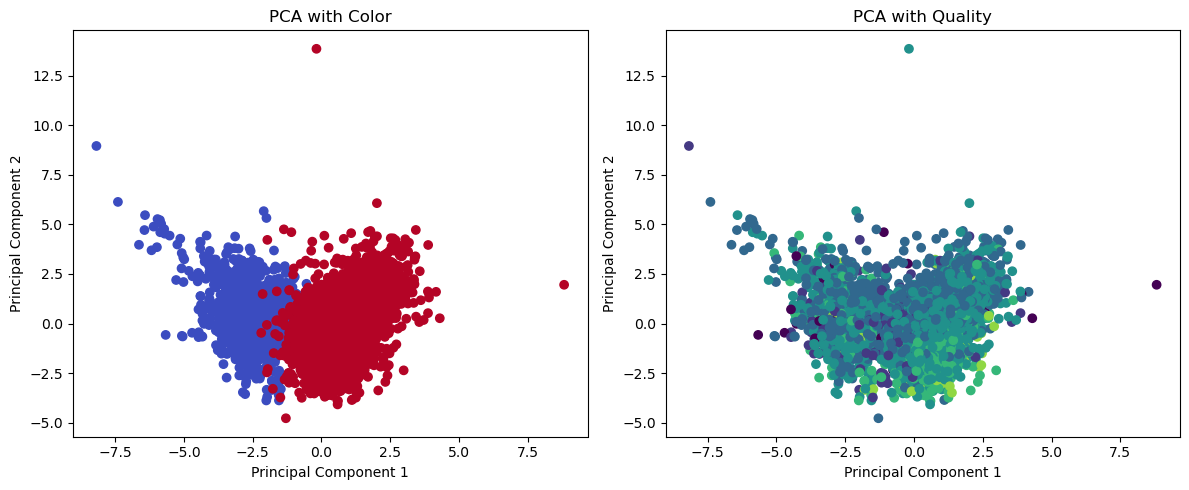

In [61]:
# Plot PCA with color-coded points
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=wine_scaled_df['color_white'], cmap='coolwarm')
plt.title('PCA with Color')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Plot PCA with quality-coded points
plt.subplot(1, 2, 2)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=wine_scaled_df['quality'], cmap='viridis')
plt.title('PCA with Quality')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">From the PCA plot, we observe the following:<br>
<strong>Color Differentiation:</strong> It seems there's a clear separation between red and white wines along the first principal component axis. This indicates that the PCA transformation is able to capture the differences between the chemical properties of red and white wines.<br>
<strong>Quality Differentiation:</strong> There's more overlap between the different quality scores, making it harder to distinguish wines based solely on quality in this PCA-transformed space.

<div class="alert alert-block alert-success">We now repeat the same visualization for tSNE.

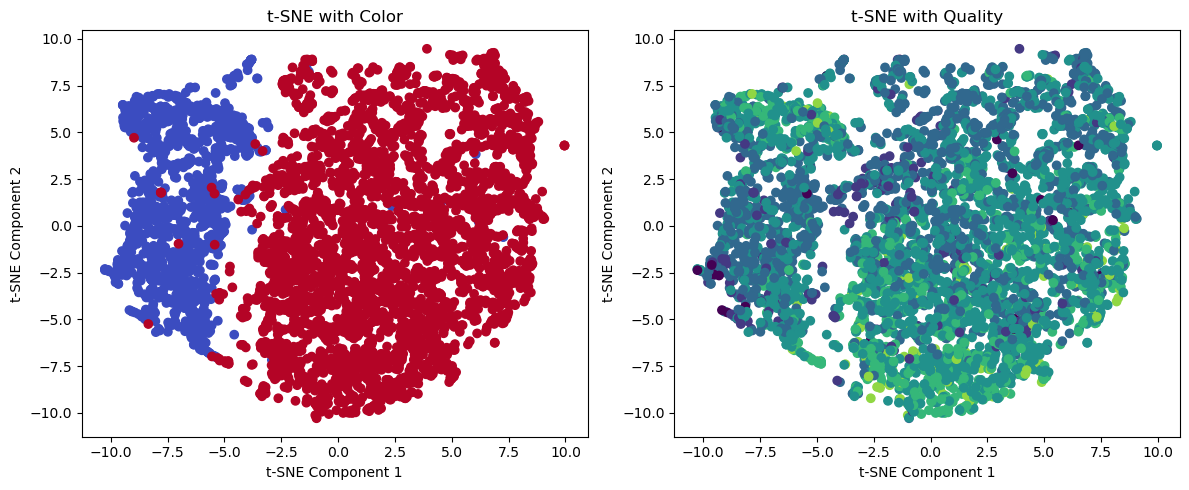

In [62]:
# Plot t-SNE with color-coded points
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=wine_scaled_df['color_white'], cmap='coolwarm')
plt.title('t-SNE with Color')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')

# Plot t-SNE with quality-coded points
plt.subplot(1, 2, 2)
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=wine_scaled_df['quality'], cmap='viridis')
plt.title('t-SNE with Quality')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')

plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">From the tSNE plot, we observe:

<strong>Color Differentiation:</strong> The tSNE transformation seems to have done an excellent job in separating the red and white wines. The clusters are distinct and there's minimal overlap between the two groups, indicating a clear distinction in chemical properties between red and white wines.<br>
<strong>Quality Differentiation:</strong> Similar to the PCA plot, the tSNE plot also shows overlap among wines of different quality scores and does a poor job of distingushing wines based on quality.

<div class="alert alert-block alert-success">Given the observations so far, tSNE appears to provide a slightly better separation between red and white wines compared to PCA while both PCA and tSNE fail to separate wines based on quality. Explain why

<div class="alert alert-block alert-success">In the next step, we apply K-Means clustering to the two-dimensional PCA-transformed features, aiming to identify two clusters. We then visualize these clusters on a scatter plot using the two principal components as axes. The clusters are color-coded allowing us to discern how the K-Means algorithm has grouped the data points in the PCA-transformed space.

/Users/barnana/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


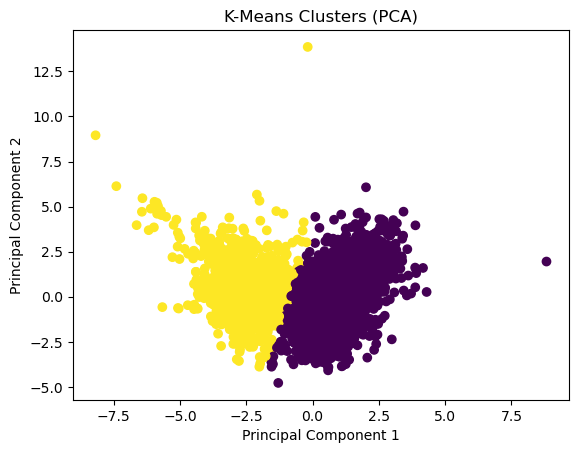

In [63]:
# Perform K-Means clustering on PCA reduced features
kmeans_pca = KMeans(n_clusters=2, random_state=42)
clusters_pca = kmeans_pca.fit_predict(pca_result)

# Visualize PCA-based clusters
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters_pca, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clusters (PCA)')
plt.show()

<div class="alert alert-block alert-success">
Using K-Means clustering, we ended up with two clear groups. Given the previous observations in the unclustered plots, it is reasonable to infer that these clusters likely correspond to red and white wines.
To be absolutely certain, one would typically compare the cluster labels assigned by K-Means to the actual labels (red or white) of the wines. If there's a high match between the cluster labels and the actual wine colors, then we can confidently say that the clusters represent red and white wines. Without this direct comparison, we're making an educated guess based on the visualizations.<br><br>
However, when we look at these groups, they don't seem to be formed based on wine quality. Instead, each group has wines of various quality levels mixed together. So, the clustering isn't separating high-quality wines from low-quality wines.

<div class="alert alert-block alert-success">We now repeat the same exercise as above for tSNE features

/Users/barnana/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


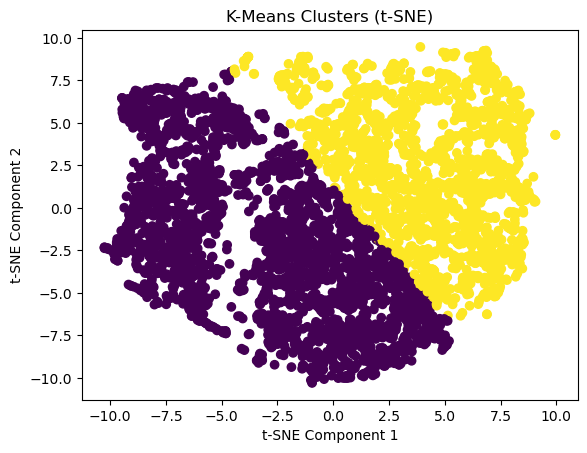

In [64]:
# Perform K-Means clustering on t-SNE features
kmeans_tsne = KMeans(n_clusters=2, random_state=42)
clusters_tsne = kmeans_tsne.fit_predict(tsne_result)

# Visualize t-SNE-based clusters
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=clusters_tsne, cmap='viridis')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('K-Means Clusters (t-SNE)')
plt.show()

<div class="alert alert-block alert-success">Using the K-Means algorithm on tSNE-transformed data, we identified certain neighborhoods or groups of similar wines. Given the patterns observed in the unclustered tSNE plots, it is unlikely that these neighborhoods represent the two types of wine - red and white. The purple cluster in the K-Means plot seems to cover a lot more points than the blue cluster in the tSNE plot.<br>
It's also evident that wine quality doesn't seem to be the primary factor bringing wines together. Within each group, we find wines spanning a range of quality scores. This suggests that the tSNE transformation, followed by K-Means, doesn't necessarily group wines based on their quality.

<div class="alert alert-block alert-success">
<strong>Conclusions:</strong><br>
<strong>Dimensionality Reduction Techniques:</strong> Both PCA and tSNE were effective in reducing the dimensionality of the wine data while preserving the distinction between red and white wines. tSNE provided a slightly clearer separation between the two wine types.<br>
<strong>Clustering:</strong> K-Means clustering on PCA features was able to create distinct clusters, likely corresponding to wine color. However, neither transformation with K-Means clustering effectively separated wines based on quality.<br>
<strong>Wine Color vs. Quality:</strong> While both PCA and tSNE could distinguish between red and white wines, neither technique was particularly effective at distinguishing wines based solely on quality. The overlap among wines of different quality scores in both visualizations suggests that the chemical properties alone may not be sufficient for this task.

# Image classification with neural networks

In this problem, you will train a neural network to classify satellite images. In the data/EuroSAT_RGB directory, you will find 11 subdirectories, each corresponding to a different class of land or land use: e.g. industrial, crops, rivers, forest, etc. Within each subdirectory, you will find examples in .jpg format of each type. (Thus the name of the directory in which the image lives is the class label.)

Your job is to set up a neural network that can classify the images as accurately as possible. Use an 80/20 train test split. Summarize your model and its accuracy in any way you see fit, but make you include at a minimum the following elements:

overall test-set accuracy, measured however you think is appropriate
show some of the example images from the test set, together with your model's predicted classes.
a confusion matrix showing the performance of the model on the set test, i.e. a table that cross-tabulates each test set example by (actual class, predicted class).
I strongly recommend the use of PyTorch in a Jupyter notebook for this problem; look into PyTorch's ImageFolder data set class, which will streamline things considerably.

<div class="alert alert-block alert-success">We will use CNN to solve this Image classification problem. 
    
In general, we prefer CNN for Image classification due to the following reasons:
    
 - **Efficient Parameter Usage:** CNNs reduce the need for excessive parameters in large images, making them computationally efficient and less prone to overfitting

 - **Spatial Pattern Recognition:** CNNs leverage local correlations in neighboring pixels to capture meaningful patterns and features in images

 - **Shift and Position Invariance:** CNNs are robust to shifts and variations in object positions

In [65]:
# Set the seed for reproducibility
torch.manual_seed(42)

<div class="alert alert-block alert-success"> We start off with the following steps :<br>

1. <strong>Load Dataset:</strong> Load EuroSAT_RGB dataset without normalization.

2. <strong>Calculate Stats:</strong> Efficiently compute mean and standard deviation in batches.

3. <strong>Normalize Data:</strong> Normalize images by subtracting mean and dividing by std. This normalization process ensures that the pixel values have a mean of approximately 0 and a standard deviation of approximately 1, which can improve model training.

4. <strong>Split for Training:</strong> Divide normalized dataset into 80% training and 20% testing.

5. <strong>Create Loaders:</strong> Build data loaders for batch processing in training and testing. Data loaders allow us to efficiently load and process data in batches during model training and evaluation.

In [66]:
import torch
from torch.utils.data import DataLoader, random_split

# Step 1: Load the dataset without normalization
data_transform_without_norm = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
])
data_dir = 'data/EuroSAT_RGB'
dataset_without_norm = ImageFolder(root=data_dir, transform=data_transform_without_norm)

# Step 2: Compute mean and standard deviation
mean = 0.
std = 0.
nb_samples = 0.
for data, _ in DataLoader(dataset_without_norm, batch_size=64, shuffle=False):
    batch_samples = data.size(0)
    data = data.view(batch_samples, data.size(1), -1)
    mean += data.mean(2).sum(0)
    std += data.std(2).sum(0)
    nb_samples += batch_samples

mean /= nb_samples
std /= nb_samples

# Step 3: Use the computed mean and std for normalization
data_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std)
])
dataset = ImageFolder(root=data_dir, transform=data_transform)

# Rest of your code remains the same
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

<div class="alert alert-block alert-success">Now we go about defining the Neural Network architecture :

 - **Create the Custom Class:** The SatelliteImageClassifier class is created which inherits from nn.Module, to define the CNN architecture.

 - **Build Convolutional Layers:** The conv_layers sequential module is constructed, which incorporates three sets of convolutional layers that are followed by ReLU activations and max-pooling operations.

 - **Construct Fully Connected Layers:** The fc_layers sequential module is built, which comprises of two fully connected layers that employ ReLU activation functions. Additionally, a dropout layer is included for regularization purposes. The final layer generates class predictions.

 - **Forward Pass Definition:** The forward method executes convolutional and fully connected layers successively to generate predictions.

In [67]:
# Define the neural network architecture
class SatelliteImageClassifier(nn.Module):
    def __init__(self, num_classes):
        super(SatelliteImageClassifier, self).__init__()
        
        # Convolutional layers: Extract features from images
        self.conv_layers = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1),  # First convolutional layer
            nn.ReLU(),                                              # Apply ReLU activation
            nn.MaxPool2d(kernel_size=2, stride=2),                 # Perform max pooling
            nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1), # Second convolutional layer
            nn.ReLU(),                                              # Apply ReLU activation
            nn.MaxPool2d(kernel_size=2, stride=2),                 # Perform max pooling
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1), # Third convolutional layer
            nn.ReLU(),                                              # Apply ReLU activation
            nn.MaxPool2d(kernel_size=2, stride=2),                 # Perform max pooling
        )
        
        # Fully connected layers: Make final predictions
        self.fc_layers = nn.Sequential(
            nn.Linear(64 * 8 * 8, 512),  # Fully connected layer with 512 output units
            nn.ReLU(),                   # Apply ReLU activation
            nn.Dropout(0.5),              # Apply dropout for regularization
            nn.Linear(512, num_classes), # Fully connected layer for class predictions
        )

    def forward(self, x):
        # Pass input through convolutional layers
        x = self.conv_layers(x)
        
        # Flatten the convolutional layer output
        x = x.view(-1, 64 * 8 * 8)
        
        # Pass the flattened output through fully connected layers
        x = self.fc_layers(x)
        
        return x

<div class="alert alert-block alert-success">In the next step, we create the model. Note that we have 10 folders in our dataset so the number of classes is 10.

In [68]:
#Create the model
num_classes = len(dataset.classes)
model = SatelliteImageClassifier(num_classes)

<div class="alert alert-block alert-success"> Now we define our loss function and optimizer.
    
 - The cross-entropy loss quantifies the discrepancy between predicted probabilities and actual class labels which drives the model to improve its classification accuracy.

 - The optimizer leverages the model's parameters to optimize and update them during training, aiming to minimize the defined loss function and improve the model's performance.
    
 - We chose a learning rate of 0.001 as it is a commonly used starting point.

In [69]:
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

<div class="alert alert-block alert-success">In this training loop, the model is trained for a set number of epochs (10 in this case). For each epoch, the model is put into training mode, and the loop iterates through batches of training data. Gradients are reset, predictions are made using the model, and the loss is calculated based on predicted outputs and actual labels. Backpropagation computes gradients, and the optimizer adjusts model parameters to minimize the loss. The cumulative loss for the epoch is tracked, and after each epoch, the average loss across batches is printed to monitor training progress.

In [70]:
# Train the model
num_epochs = 10  # Number of training epochs

# Loop through each epoch
for epoch in range(num_epochs):

    # Set the model to training mode
    model.train()

    # Initialize running loss for the current epoch
    running_loss = 0.0

    # Loop through batches in the training loader
    for inputs, labels in train_loader:

        # Reset gradients
        optimizer.zero_grad()

        # Forward pass: obtain model predictions
        outputs = model(inputs)

        # Compute the loss
        loss = criterion(outputs, labels)

        # Backpropagation: compute gradients
        loss.backward()

        # Update model parameters using optimizer
        optimizer.step()

        # Accumulate the loss for the current batch
        running_loss += loss.item()

    # Print the average loss for the epoch
    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {running_loss / len(train_loader)}")

Epoch 1/10, Loss: 0.9688384404196542
Epoch 2/10, Loss: 0.5952628262825972
Epoch 3/10, Loss: 0.47064186037468486
Epoch 4/10, Loss: 0.3750559288192783
Epoch 5/10, Loss: 0.3250428453616842
Epoch 6/10, Loss: 0.25755392160465024
Epoch 7/10, Loss: 0.21295554398079597
Epoch 8/10, Loss: 0.1859351163895349
Epoch 9/10, Loss: 0.16471596902026933
Epoch 10/10, Loss: 0.13335082557647537


<div class="alert alert-block alert-success">In this next code segment, the trained model is evaluated on a test dataset. The model is set to evaluation mode, and counters are initialized to track correct predictions and total samples. Within a loop through test batches, the model predicts labels and calculates accuracy by comparing predicted and true labels. The results are used to assess the model's performance on the test set. Furthermore, the precision, recall, and F1-score metrics are calculated using the stored predicted and true labels, giving a more comprehensive understanding of the model's performance across different classes.

In [73]:
# Evaluate the model on the test set
model.eval()  # Set the model in evaluation mode

# Initialize counters
correct = 0  # Counter for correctly predicted samples
total = 0    # Counter for total samples

# Initialize lists to store predicted and true labels
predicted_labels = []
true_labels = []

# Disable gradient calculation during evaluation
with torch.no_grad():

    # Loop through batches in the test loader
    for inputs, labels in test_loader:

        # Make predictions using the model
        outputs = model(inputs)
        
        # Find the predicted labels for each sample
        _, predicted = torch.max(outputs.data, 1)
        
        # Count the total number of samples in the batch
        total += labels.size(0)
        
        # Count correct predictions in the batch
        correct += (predicted == labels).sum().item()
        
        # Store predicted and true labels for the batch
        predicted_labels.extend(predicted.cpu().numpy())
        true_labels.extend(labels.cpu().numpy())

# Calculate overall test-set accuracy
accuracy = correct / total
print(f"Test-set Accuracy: {accuracy:.4f}")

# Calculate precision, recall, and F1-score
precision = precision_score(true_labels, predicted_labels, average='weighted')
recall = recall_score(true_labels, predicted_labels, average='weighted')
f1 = f1_score(true_labels, predicted_labels, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Test-set Accuracy: 0.9109
Precision: 0.9110
Recall: 0.9109
F1-Score: 0.9100


<div class="alert alert-block alert-success">In the next step, we are generating and visualizing a confusion matrix based on the true labels and the predictions made by the model on the test set. This visual representation provides an intuitive way to quickly identify which classes the model is accurately predicting and where it's making errors.

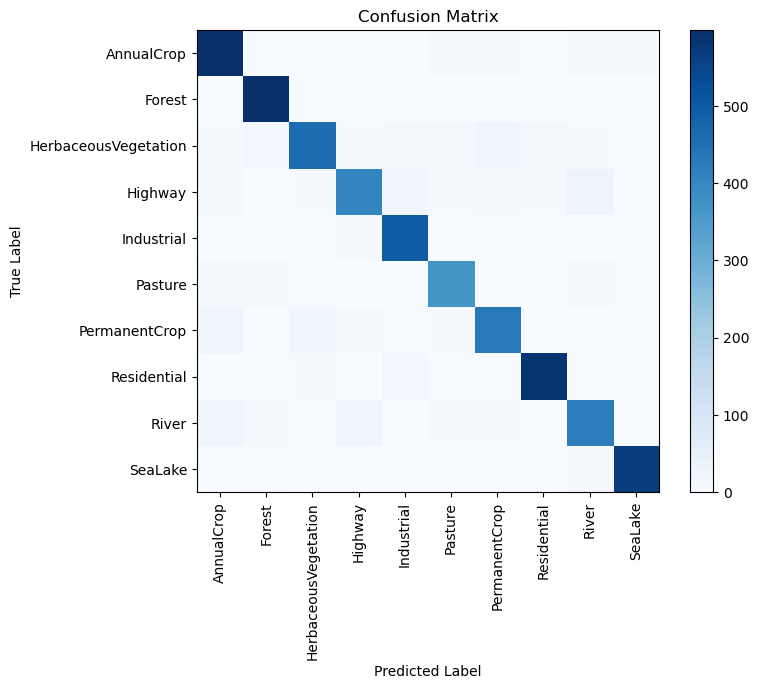

In [74]:
# Create the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Display the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(dataset.classes))
plt.xticks(tick_marks, dataset.classes, rotation=90)
plt.yticks(tick_marks, dataset.classes)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

<div class="alert alert-block alert-success">In our final step, we visualize a selection of test dataset images and their labels in a 2x5 grid using matplotlib. For each image, we retrieve true and predicted class labels. 
Note that we are reshaping the image's dimensions from PyTorch format to Matplotlib format. This ensures proper visualization by rearranging the channels to the end.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

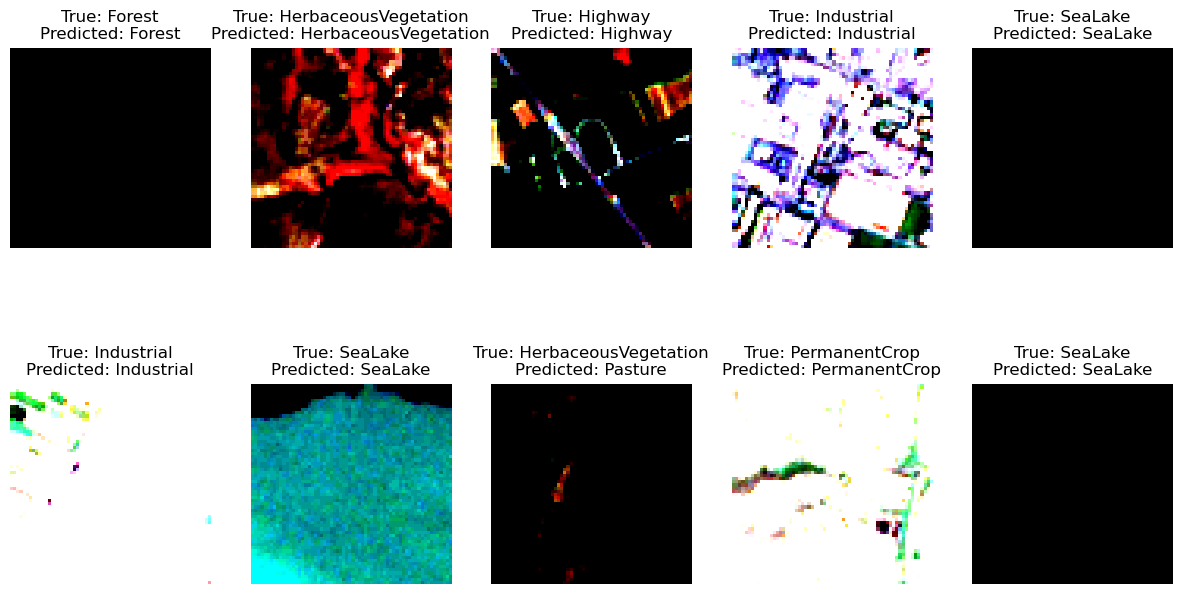

In [75]:
# Display some example images from the test set with their predicted classes
fig, axes = plt.subplots(2, 5, figsize=(15, 8))
for i, ax in enumerate(axes.ravel()):
    img = np.transpose(test_dataset[i][0].numpy(), (1, 2, 0))
    true_class = dataset.classes[true_labels[i]]
    predicted_class = dataset.classes[predicted_labels[i]]
    ax.imshow(img)
    ax.set_title(f"True: {true_class}\nPredicted: {predicted_class}")
    ax.axis('off')